The Dutch Housing market is in a crisis, stemming from a range of possible factors such as a tight amount of space to immigration to overregulation. It is quite well known houses are expensive in NL, but how expensive are we talking per unit such as square meter, and how can we figure if a house is reasonably priced, and can we predict a house price based off of factors such as square footage and property type?

Data source: https://www.kaggle.com/datasets/bryan2k19/dutch-house-prices-dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
file = r"C:arbitrary file path\NederlandsHuisprijzen\raw_data.csv"

In [3]:
df = pd.read_csv(file)
pd.set_option('display.max_columns', None)

# Data Prep

A bunch of consolidation, seperation, and making it readable

## Price

In [4]:
prices = df['Price']
for n, price in enumerate(prices):
    try:
        numeric_filter = filter(str.isdigit, price)
        prices[n]= float("".join(numeric_filter))
    except:
        prices[n] = np.nan
df = df.astype({'Price': float})
df

,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2
0,Bovenweg 223,Sint Pancras,525000.0,251 m²,135 m²,1972,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035
1,Julianastraat 19,Waddinxveen,425000.0,181 m²,109 m²,1935,Bestaande bouw,"Herenhuis, geschakelde 2-onder-1-kapwoning",Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,575000.0,198 m²,138 m²,1986,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,259500.0,231 m²,92 m²,1989,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,1050000.0,423 m²,210 m²,2000,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Buorren 46,Bitgum,215000.0,320 m²,101 m²,1793,Bestaande bouw,"Eengezinswoning, vrijstaande woning",Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,F,"Aan rustige weg, in centrum en vrij uitzicht",Voortuin en zijtuin,755
5551,Rijksstraatweg 96,Hurdegaryp,289000.0,943 m²,80 m²,1932,Bestaande bouw,"Eengezinswoning, vrijstaande woning",Samengesteld dak bedekt met bitumineuze dakbed...,6 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,G,Aan drukke weg,"Achtertuin, voortuin en zijtuin",4.735
5552,Kwekerijstraat 7,Breda,450000.0,282 m²,104 m²,1921,Bestaande bouw,"Eengezinswoning, vrijstaande woning",Mansarde dak bedekt met bitumineuze dakbedekki...,4 kamers (1 slaapkamer),1 badkamer en 1 apart toilet,2 woonlagen,G,"Aan rustige weg, beschutte ligging en in woonwijk",Achtertuin en voortuin,10.265
5553,De Eg 17,Groesbeek,635000.0,497 m²,155 m²,1996,Bestaande bouw,"Eengezinswoning, vrijstaande woning",Zadeldak bedekt met pannen,6 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen en een zolder,B,"Aan rustige weg, in bosrijke omgeving, in woon...",Tuin rondom,2.205


## Living space

In [5]:
housearea = df['Living space size (m2)']
for n, square in enumerate (housearea):
    numeric_filter = filter(str.isdigit, square)
    housearea[n]= float("".join(numeric_filter).replace('²',''))
    
df = df.astype({'Living space size (m2)': float})

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\2505383893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housearea[n]= float("".join(numeric_filter).replace('²',''))


In [6]:
len(df['Living space size (m2)'])

5555

## Lot area

In [7]:
lotarea = df['Lot size (m2)']

for n, square in enumerate (lotarea):
    numeric_filter = filter(str.isdigit, square)
    lotarea[n]= float("".join(numeric_filter).replace('²',''))

df = df.astype({'Lot size (m2)': float})
df

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\4088633208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lotarea[n]= float("".join(numeric_filter).replace('²',''))


,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2
0,Bovenweg 223,Sint Pancras,525000.0,251.0,135.0,1972,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035
1,Julianastraat 19,Waddinxveen,425000.0,181.0,109.0,1935,Bestaande bouw,"Herenhuis, geschakelde 2-onder-1-kapwoning",Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,575000.0,198.0,138.0,1986,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,259500.0,231.0,92.0,1989,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,1050000.0,423.0,210.0,2000,Bestaande bouw,"Eengezinswoning, 2-onder-1-kapwoning",Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Buorren 46,Bitgum,215000.0,320.0,101.0,1793,Bestaande bouw,"Eengezinswoning, vrijstaande woning",Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,F,"Aan rustige weg, in centrum en vrij uitzicht",Voortuin en zijtuin,755
5551,Rijksstraatweg 96,Hurdegaryp,289000.0,943.0,80.0,1932,Bestaande bouw,"Eengezinswoning, vrijstaande woning",Samengesteld dak bedekt met bitumineuze dakbed...,6 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,G,Aan drukke weg,"Achtertuin, voortuin en zijtuin",4.735
5552,Kwekerijstraat 7,Breda,450000.0,282.0,104.0,1921,Bestaande bouw,"Eengezinswoning, vrijstaande woning",Mansarde dak bedekt met bitumineuze dakbedekki...,4 kamers (1 slaapkamer),1 badkamer en 1 apart toilet,2 woonlagen,G,"Aan rustige weg, beschutte ligging en in woonwijk",Achtertuin en voortuin,10.265
5553,De Eg 17,Groesbeek,635000.0,497.0,155.0,1996,Bestaande bouw,"Eengezinswoning, vrijstaande woning",Zadeldak bedekt met pannen,6 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen en een zolder,B,"Aan rustige weg, in bosrijke omgeving, in woon...",Tuin rondom,2.205


## Build year

In [8]:
buildyear = df['Build year']

for n, year in enumerate(buildyear):
    if type(year) != float:
        numeric_filter = filter(str.isdigit, year)
        buildyear[n]= float("".join(numeric_filter))
    if year == 'nan':
        buildyear[n] = np.nan
    else:
        continue


df = df.astype({'Build year': float})

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\1960098421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildyear[n]= float("".join(numeric_filter))


In [9]:
for n, year in enumerate(df['Build year']):
    if year >= 10000:
        df['Build year'][n] = year/10

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\1963781341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Build year'][n] = year/10


## Housetype

In [10]:
housetype = df['House type']
housetype.unique()

array(['Eengezinswoning, 2-onder-1-kapwoning',
       'Herenhuis, geschakelde 2-onder-1-kapwoning',
       'Eengezinswoning, tussenwoning', 'Eengezinswoning, hoekwoning',
       'Eengezinswoning, vrijstaande woning', 'Villa, vrijstaande woning',
       'Bungalow, geschakelde woning (semi-bungalow)',
       'Eengezinswoning, tussenwoning (split-level woning)',
       'Eengezinswoning, eindwoning',
       'Eengezinswoning, halfvrijstaande woning (kwadrant woning)',
       'Eengezinswoning, geschakelde 2-onder-1-kapwoning',
       'Eengezinswoning, geschakelde woning',
       'Herenhuis, 2-onder-1-kapwoning', 'Bungalow, geschakelde woning',
       'Eengezinswoning, vrijstaande woning (dijkwoning)',
       'Woonboerderij, vrijstaande woning',
       'Eengezinswoning, halfvrijstaande woning',
       'Landhuis, vrijstaande woning',
       'Eengezinswoning, tussenwoning (drive-in woning)',
       'Herenhuis, tussenwoning', 'Bungalow, vrijstaande woning',
       'Bungalow, vrijstaande woning (

In [11]:
for n, house in enumerate(housetype):
    index = house.index(',')
    housetype[n] = house[:index]

df

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\2756598991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housetype[n] = house[:index]


,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2
0,Bovenweg 223,Sint Pancras,525000.0,251.0,135.0,1972.0,Bestaande bouw,Eengezinswoning,Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035
1,Julianastraat 19,Waddinxveen,425000.0,181.0,109.0,1935.0,Bestaande bouw,Herenhuis,Schilddak bedekt met bitumineuze dakbedekking ...,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,575000.0,198.0,138.0,1986.0,Bestaande bouw,Eengezinswoning,Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,259500.0,231.0,92.0,1989.0,Bestaande bouw,Eengezinswoning,Zadeldak bedekt met pannen,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,1050000.0,423.0,210.0,2000.0,Bestaande bouw,Eengezinswoning,Schilddak bedekt met pannen,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Buorren 46,Bitgum,215000.0,320.0,101.0,1793.0,Bestaande bouw,Eengezinswoning,Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,F,"Aan rustige weg, in centrum en vrij uitzicht",Voortuin en zijtuin,755
5551,Rijksstraatweg 96,Hurdegaryp,289000.0,943.0,80.0,1932.0,Bestaande bouw,Eengezinswoning,Samengesteld dak bedekt met bitumineuze dakbed...,6 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,G,Aan drukke weg,"Achtertuin, voortuin en zijtuin",4.735
5552,Kwekerijstraat 7,Breda,450000.0,282.0,104.0,1921.0,Bestaande bouw,Eengezinswoning,Mansarde dak bedekt met bitumineuze dakbedekki...,4 kamers (1 slaapkamer),1 badkamer en 1 apart toilet,2 woonlagen,G,"Aan rustige weg, beschutte ligging en in woonwijk",Achtertuin en voortuin,10.265
5553,De Eg 17,Groesbeek,635000.0,497.0,155.0,1996.0,Bestaande bouw,Eengezinswoning,Zadeldak bedekt met pannen,6 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen en een zolder,B,"Aan rustige weg, in bosrijke omgeving, in woon...",Tuin rondom,2.205


## Roof Type

In [12]:
rooftype = df['Roof']
rooftype.unique()

array(['Zadeldak bedekt met pannen',
       'Schilddak bedekt met bitumineuze dakbedekking en pannen',
       'Schilddak bedekt met pannen', 'Dwarskap bedekt met pannen',
       'Zadeldak', 'Plat dak bedekt met bitumineuze dakbedekking',
       'Samengesteld dak bedekt met pannen',
       'Lessenaardak bedekt met metaal',
       'Zadeldak bedekt met bitumineuze dakbedekking en pannen',
       'Lessenaardak', 'Dwarskap',
       'Samengesteld dak bedekt met bitumineuze dakbedekking en pannen',
       'Plat dak', 'Mansarde dak bedekt met pannen',
       'Zadeldak bedekt met overig en pannen',
       'Plat dak bedekt met bitumineuze dakbedekking en pannen',
       'Mansarde dak bedekt met bitumineuze dakbedekking en pannen',
       'Samengesteld dak', 'Zadeldak bedekt met pannen en riet',
       'Dwarskap bedekt met overig', 'Zadeldak bedekt met riet',
       'Tentdak bedekt met pannen', 'Mansarde dak bedekt met riet',
       'Zadeldak bedekt met asbest en pannen',
       'Plat dak bedekt 

In [13]:
for n, roof in enumerate(rooftype):
    try:
        index = roof.index(' ')
        rooftype[n] = roof[:index]
    except:
        continue

df

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\1675294702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rooftype[n] = roof[:index]


,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2
0,Bovenweg 223,Sint Pancras,525000.0,251.0,135.0,1972.0,Bestaande bouw,Eengezinswoning,Zadeldak,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035
1,Julianastraat 19,Waddinxveen,425000.0,181.0,109.0,1935.0,Bestaande bouw,Herenhuis,Schilddak,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435
2,Kuipersgilde 3,Houten,575000.0,198.0,138.0,1986.0,Bestaande bouw,Eengezinswoning,Zadeldak,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855
3,De Kamp 1 A,Pannerden,259500.0,231.0,92.0,1989.0,Bestaande bouw,Eengezinswoning,Zadeldak,5 kamers (3 slaapkamers),1 badkamer en 2 aparte toiletten,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190
4,Wildrijklaan 8,Sassenheim,1050000.0,423.0,210.0,2000.0,Bestaande bouw,Eengezinswoning,Schilddak,6 kamers (5 slaapkamers),2 badkamers en 2 aparte toiletten,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Buorren 46,Bitgum,215000.0,320.0,101.0,1793.0,Bestaande bouw,Eengezinswoning,Zadeldak,4 kamers (3 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,F,"Aan rustige weg, in centrum en vrij uitzicht",Voortuin en zijtuin,755
5551,Rijksstraatweg 96,Hurdegaryp,289000.0,943.0,80.0,1932.0,Bestaande bouw,Eengezinswoning,Samengesteld,6 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen,G,Aan drukke weg,"Achtertuin, voortuin en zijtuin",4.735
5552,Kwekerijstraat 7,Breda,450000.0,282.0,104.0,1921.0,Bestaande bouw,Eengezinswoning,Mansarde,4 kamers (1 slaapkamer),1 badkamer en 1 apart toilet,2 woonlagen,G,"Aan rustige weg, beschutte ligging en in woonwijk",Achtertuin en voortuin,10.265
5553,De Eg 17,Groesbeek,635000.0,497.0,155.0,1996.0,Bestaande bouw,Eengezinswoning,Zadeldak,6 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,2 woonlagen en een zolder,B,"Aan rustige weg, in bosrijke omgeving, in woon...",Tuin rondom,2.205


## Rooms

In [14]:
rooms = df['Rooms']
rooms.unique()

array(['5 kamers (4 slaapkamers)', '4 kamers (3 slaapkamers)',
       '5 kamers (3 slaapkamers)', '6 kamers (5 slaapkamers)',
       '7 kamers (6 slaapkamers)', '9 kamers (7 slaapkamers)',
       '3 kamers (2 slaapkamers)', '4 kamers (2 slaapkamers)',
       '9 kamers (4 slaapkamers)', '6 kamers (4 slaapkamers)',
       '8 kamers (4 slaapkamers)', '10 kamers (4 slaapkamers)',
       '7 kamers (4 slaapkamers)', '7 kamers (5 slaapkamers)',
       '6 kamers (3 slaapkamers)', '12 kamers (6 slaapkamers)',
       '9 kamers (8 slaapkamers)', '4 kamers (4 slaapkamers)',
       '7 kamers (3 slaapkamers)', '6 kamers (6 slaapkamers)',
       '8 kamers (6 slaapkamers)', '9 kamers (6 slaapkamers)',
       '5 kamers (2 slaapkamers)', '7 kamers (2 slaapkamers)',
       '8 kamers (5 slaapkamers)', '11 kamers (5 slaapkamers)',
       '8 kamers (7 slaapkamers)', '11 kamers (6 slaapkamers)',
       '5 kamers (5 slaapkamers)', '10 kamers (3 slaapkamers)',
       '2 kamers (1 slaapkamer)', '9 kamers (5 sla

In [15]:
bedrooms = []
for n, room in enumerate(rooms):
    try:
        index1 = room.index(' ')
        index2 = room.index('(')
        
        bedroom = room[index2:]        
        numeric_filter = filter(str.isdigit, bedroom)
        bedrooms.append(float("".join(numeric_filter)))
        
        rooms[n] = float(room[:index1])
        
    except:
        index1 = room.index(' ')
        rooms[n] = float(room[:index1])
        bedrooms.append(np.nan)
df = df.astype({'Rooms': float})

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\245021844.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rooms[n] = float(room[:index1])
C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\245021844.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rooms[n] = float(room[:index1])


In [16]:
rooms.unique()

array([5.0, 4.0, 6.0, 7.0, 9.0, 3.0, 8.0, 10.0, 12.0, 11.0, 2.0, 13.0,
       14.0, 15.0, 16.0, 18.0, 17.0], dtype=object)

In [17]:
df['bedrooms'] = bedrooms

## Toilets

In [18]:
toilets = df['Toilet']
toilets.unique()

array(['1 badkamer en 1 apart toilet', '1 badkamer en 2 aparte toiletten',
       '2 badkamers en 2 aparte toiletten',
       '3 badkamers en 2 aparte toiletten', '1 badkamer',
       '2 badkamers en 1 apart toilet', '3 badkamers en 1 apart toilet',
       '2 badkamers en 3 aparte toiletten', '2 badkamers',
       '4 badkamers en 1 apart toilet',
       '3 badkamers en 3 aparte toiletten',
       '1 badkamer en 3 aparte toiletten', '3 badkamers',
       '4 badkamers en 3 aparte toiletten',
       '2 badkamers en 4 aparte toiletten',
       '6 badkamers en 1 apart toilet',
       '4 badkamers en 2 aparte toiletten',
       '5 badkamers en 1 apart toilet', '7 badkamers en 1 apart toilet',
       '1 badkamer en 4 aparte toiletten',
       '3 badkamers en 4 aparte toiletten',
       '5 badkamers en 2 aparte toiletten'], dtype=object)

In [19]:
toilet = toilets[0]
toilet.index('apart')

16

All values are single digit so no need to do fancy coding

In [20]:
for n, toilet in enumerate(toilets):
    try:
        index = toilet.index('apart')
        toilets[n] = float(toilet[index - 2]) + float(toilet[0])

    except:
        toilets[n] = float(toilet[0])

df = df.astype({'Toilet': float})

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\2989697546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toilets[n] = float(toilet[index - 2]) + float(toilet[0])
C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\2989697546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toilets[n] = float(toilet[0])


## Floors

In [21]:
df

,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2,bedrooms
0,Bovenweg 223,Sint Pancras,525000.0,251.0,135.0,1972.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,2.0,3 woonlagen,D,NaN,"Achtertuin, voortuin en zijtuin",6.035,4.0
1,Julianastraat 19,Waddinxveen,425000.0,181.0,109.0,1935.0,Bestaande bouw,Herenhuis,Schilddak,4.0,2.0,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435,3.0
2,Kuipersgilde 3,Houten,575000.0,198.0,138.0,1986.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,2.0,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1.855,4.0
3,De Kamp 1 A,Pannerden,259500.0,231.0,92.0,1989.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,3.0,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190,3.0
4,Wildrijklaan 8,Sassenheim,1050000.0,423.0,210.0,2000.0,Bestaande bouw,Eengezinswoning,Schilddak,6.0,4.0,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Buorren 46,Bitgum,215000.0,320.0,101.0,1793.0,Bestaande bouw,Eengezinswoning,Zadeldak,4.0,2.0,2 woonlagen,F,"Aan rustige weg, in centrum en vrij uitzicht",Voortuin en zijtuin,755,3.0
5551,Rijksstraatweg 96,Hurdegaryp,289000.0,943.0,80.0,1932.0,Bestaande bouw,Eengezinswoning,Samengesteld,6.0,2.0,2 woonlagen,G,Aan drukke weg,"Achtertuin, voortuin en zijtuin",4.735,4.0
5552,Kwekerijstraat 7,Breda,450000.0,282.0,104.0,1921.0,Bestaande bouw,Eengezinswoning,Mansarde,4.0,2.0,2 woonlagen,G,"Aan rustige weg, beschutte ligging en in woonwijk",Achtertuin en voortuin,10.265,1.0
5553,De Eg 17,Groesbeek,635000.0,497.0,155.0,1996.0,Bestaande bouw,Eengezinswoning,Zadeldak,6.0,2.0,2 woonlagen en een zolder,B,"Aan rustige weg, in bosrijke omgeving, in woon...",Tuin rondom,2.205,4.0


In [22]:
floors = df['Floors']
floors.unique()

array(['3 woonlagen', '4 woonlagen en een kelder',
       '2 woonlagen en een vliering', '2 woonlagen',
       '2 woonlagen en een zolder', '3 woonlagen en een vliering',
       '3 woonlagen en een kelder', '2 woonlagen en een kelder',
       '1 woonlaag', '4 woonlagen', '1 woonlaag en een zolder',
       '2 woonlagen, een zolder en een kelder',
       '3 woonlagen en een zolder',
       '3 woonlagen, een zolder en een kelder',
       '2 woonlagen, een vliering en een kelder',
       '2 woonlagen en een zolder met vliering',
       '1 woonlaag en een kelder',
       '1 woonlaag, een vliering en een kelder',
       '2 woonlagen, een zolder met vliering en een kelder',
       '3 woonlagen, een vliering en een kelder', '5 woonlagen',
       '5 woonlagen en een kelder',
       '4 woonlagen, een zolder en een kelder',
       '1 woonlaag, een zolder en een kelder',
       '4 woonlagen en een zolder', '4 woonlagen en een vliering',
       '4 woonlagen, een vliering en een kelder',
       '1 w

In [23]:
basement = []
attic = []

for n, floor in enumerate(floors):
    if 'kelder' in floor:
        basement.append(1)
    else:
        basement.append(0)
    
    
    if ('zolder' or 'vliering') in floor: #Zolder and vliering are basically the same thing
        attic.append(1)
    else:
        attic.append(0)
    
    floors[n] = floor[0]

df = df.astype({'Floors': float})

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\117235748.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floors[n] = floor[0]


In [24]:
df['basement'] = basement
df['attic'] = attic

## Energy label

In [25]:
energies = df['Energy label']
energies.unique()

array(['D', 'E', 'B', 'A', 'C', 'G', 'F', 'A+++', 'Niet verplicht', 'A++',
       'A+', 'A++++'], dtype=object)

In [26]:
mapping = {'A++++': 1, 'A+++': 2, 'A++': 3, 'A+': 4, 'A': 5, 'B': 6, 'C': 7, 'D': 8, 'E': 9, 'F': 10, 'G': 11, 'Niet verplicht': np.nan}

energies = energies.replace(mapping)

df['Energy label'] = energies

In [27]:
df

,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2,bedrooms,basement,attic
0,Bovenweg 223,Sint Pancras,525000.0,251.0,135.0,1972.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,2.0,3.0,8.0,NaN,"Achtertuin, voortuin en zijtuin",6.035,4.0,0,0
1,Julianastraat 19,Waddinxveen,425000.0,181.0,109.0,1935.0,Bestaande bouw,Herenhuis,Schilddak,4.0,2.0,3.0,9.0,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435,3.0,0,0
2,Kuipersgilde 3,Houten,575000.0,198.0,138.0,1986.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,2.0,3.0,6.0,Aan rustige weg en in woonwijk,Achtertuin,1.855,4.0,0,0
3,De Kamp 1 A,Pannerden,259500.0,231.0,92.0,1989.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,3.0,3.0,6.0,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190,3.0,0,0
4,Wildrijklaan 8,Sassenheim,1050000.0,423.0,210.0,2000.0,Bestaande bouw,Eengezinswoning,Schilddak,6.0,4.0,4.0,5.0,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Buorren 46,Bitgum,215000.0,320.0,101.0,1793.0,Bestaande bouw,Eengezinswoning,Zadeldak,4.0,2.0,2.0,10.0,"Aan rustige weg, in centrum en vrij uitzicht",Voortuin en zijtuin,755,3.0,0,0
5551,Rijksstraatweg 96,Hurdegaryp,289000.0,943.0,80.0,1932.0,Bestaande bouw,Eengezinswoning,Samengesteld,6.0,2.0,2.0,11.0,Aan drukke weg,"Achtertuin, voortuin en zijtuin",4.735,4.0,0,0
5552,Kwekerijstraat 7,Breda,450000.0,282.0,104.0,1921.0,Bestaande bouw,Eengezinswoning,Mansarde,4.0,2.0,2.0,11.0,"Aan rustige weg, beschutte ligging en in woonwijk",Achtertuin en voortuin,10.265,1.0,0,0
5553,De Eg 17,Groesbeek,635000.0,497.0,155.0,1996.0,Bestaande bouw,Eengezinswoning,Zadeldak,6.0,2.0,2.0,6.0,"Aan rustige weg, in bosrijke omgeving, in woon...",Tuin rondom,2.205,4.0,0,1


## Position

In [28]:
positions = df['Position']
positions.unique()

array([nan, 'Aan rustige weg en in woonwijk',
       'Aan rustige weg, aan water, beschutte ligging, in woonwijk en vrij uitzicht',
       'In woonwijk', 'Aan rustige weg, beschutte ligging en in centrum',
       'Aan rustige weg, aan water, in bosrijke omgeving, landelijk gelegen en vrij uitzicht',
       'In centrum en in woonwijk',
       'Aan rustige weg, beschutte ligging, buiten bebouwde kom, in woonwijk, landelijk gelegen en vrij uitzicht',
       'Vrij uitzicht',
       'Aan rustige weg, beschutte ligging en in woonwijk',
       'Aan rustige weg, in woonwijk en vrij uitzicht',
       'Aan park, aan rustige weg en in woonwijk', 'Aan rustige weg',
       'In centrum', 'Aan rustige weg, aan water en in woonwijk',
       'Aan rustige weg, beschutte ligging en vrij uitzicht',
       'Aan rustige weg, beschutte ligging, in woonwijk, landelijk gelegen, open ligging en vrij uitzicht',
       'Aan water, in woonwijk en vrij uitzicht',
       'Aan rustige weg, in bosrijke omgeving en in 

In [29]:
centrum = []
park = []
landelijk = []
woonwijk = []
beschutte = []

for n, position in enumerate(positions):
    try:
        ## In city center
        if 'centrum' in position.lower():
            centrum.append(1)
        else:
            centrum.append(0)

        ## By Park
        if ('aan park') in position.lower():
            park.append(1)
        else:
            park.append(0)

        ## Rural
        if ('landelijk gelegen') in position.lower():
            landelijk.append(1)
        else:
            landelijk.append(0)

        ## Residential area
        if ('woonwijk') in position.lower():
            woonwijk.append(1)
        else:
            woonwijk.append(0)

        ## Isolated
        if ('beschutte') in position.lower():
            beschutte.append(1)
        else:
            beschutte.append(0)
    except:
        centrum.append(0)
        park.append(0)
        landelijk.append(0)
        woonwijk.append(0)
        beschutte.append(0)

In [30]:
df['centrum'] = centrum
df['park'] = park
df['landelijk'] = landelijk
df['woonwijk'] = woonwijk
df['beschutte'] = beschutte

## Gardens

In [31]:
gardens = df['Garden']
gardens.unique()

array(['Achtertuin, voortuin en zijtuin', 'Achtertuin en voortuin',
       'Achtertuin', 'Voortuin en zijtuin', 'Tuin rondom',
       'Patio/atrium en voortuin', 'Achtertuin en zijtuin',
       'Achtertuin en tuin rondom',
       'Patio/atrium, voortuin en zonneterras',
       'Achtertuin, voortuin, zijtuin en zonneterras',
       'Achtertuin en zonneterras', 'Voortuin en zonneterras',
       'Voortuin, zijtuin en zonneterras',
       'Achtertuin, tuin rondom en voortuin',
       'Achtertuin, voortuin en zonneterras', 'Patio/atrium',
       'Tuin rondom en zonneterras', 'Zijtuin', 'Voortuin', nan,
       'Achtertuin, tuin rondom, voortuin en zijtuin',
       'Patio/atrium en zonneterras', 'Plaats',
       'Achtertuin, tuin rondom, voortuin, zijtuin en zonneterras',
       'Achtertuin, plaats en voortuin', 'Plaats en zonneterras',
       'Achtertuin, patio/atrium en voortuin', 'Zonneterras',
       'Achtertuin en patio/atrium', 'Tuin rondom en zijtuin',
       'Plaats en voortuin', 'Ach

In [32]:
front = []
back = []
side = []
patio = []
sundeck = []
gardenaround = []
plaats = []

for n, garden in enumerate(gardens):
    try:
        if 'achtertuin' in garden.lower():
            back.append(1)
        else:
            back.append(0)


        if 'voortuin' in garden.lower():
            front.append(1)
        else:
            front.append(0)


        if 'zonneterras' in garden.lower():
            sundeck.append(1)
        else:
            sundeck.append(0)


        if 'patio' in garden.lower(): 
            patio.append(1)
        else:
            patio.append(0)


        if 'zijtuin' in garden.lower():
            side.append(1)
        else:
            side.append(0)


        if 'tuin rondom' in garden.lower(): 
            gardenaround.append(1)
        else:
            gardenaround.append(0)
    
    except:
        back.append(np.nan)
        front.append(np.nan)
        sundeck.append(np.nan)
        patio.append(np.nan)
        side.append(np.nan)
        gardenaround.append(np.nan)
        

        

In [33]:
df['front'] = front
df['back'] = back
df['sundeck'] = sundeck
df['patio'] = patio
df['side'] = side
df['gardenaround'] = gardenaround

## Neighborhood

In [34]:
neighborhood = df['Estimated neighbourhood price per m2']

In [35]:
for n, hood in enumerate(neighborhood):
    if type(hood) == str:
        hood = hood.replace('€', '')
        neighborhood[n] = float(hood)
    if type(hood) == float:
        continue
#     try:
#         numeric_filter = filter(str.isdigit, hood)
#         neighborhood[n]= float("".join(numeric_filter))
#     except:
#         neighborhood[n] = np.nan
df = df.astype({'Estimated neighbourhood price per m2': float})
df

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\3373675249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhood[n] = float(hood)


,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2,bedrooms,basement,attic,centrum,park,landelijk,woonwijk,beschutte,front,back,sundeck,patio,side,gardenaround
0,Bovenweg 223,Sint Pancras,525000.0,251.0,135.0,1972.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,2.0,3.0,8.0,NaN,"Achtertuin, voortuin en zijtuin",6.035,4.0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0
1,Julianastraat 19,Waddinxveen,425000.0,181.0,109.0,1935.0,Bestaande bouw,Herenhuis,Schilddak,4.0,2.0,3.0,9.0,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1.435,3.0,0,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0
2,Kuipersgilde 3,Houten,575000.0,198.0,138.0,1986.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,2.0,3.0,6.0,Aan rustige weg en in woonwijk,Achtertuin,1.855,4.0,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0
3,De Kamp 1 A,Pannerden,259500.0,231.0,92.0,1989.0,Bestaande bouw,Eengezinswoning,Zadeldak,5.0,3.0,3.0,6.0,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2.190,3.0,0,0,0,0,0,1,0,1.0,1.0,0.0,0.0,1.0,0.0
4,Wildrijklaan 8,Sassenheim,1050000.0,423.0,210.0,2000.0,Bestaande bouw,Eengezinswoning,Schilddak,6.0,4.0,4.0,5.0,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1.340,5.0,1,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Buorren 46,Bitgum,215000.0,320.0,101.0,1793.0,Bestaande bouw,Eengezinswoning,Zadeldak,4.0,2.0,2.0,10.0,"Aan rustige weg, in centrum en vrij uitzicht",Voortuin en zijtuin,755.000,3.0,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0
5551,Rijksstraatweg 96,Hurdegaryp,289000.0,943.0,80.0,1932.0,Bestaande bouw,Eengezinswoning,Samengesteld,6.0,2.0,2.0,11.0,Aan drukke weg,"Achtertuin, voortuin en zijtuin",4.735,4.0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0
5552,Kwekerijstraat 7,Breda,450000.0,282.0,104.0,1921.0,Bestaande bouw,Eengezinswoning,Mansarde,4.0,2.0,2.0,11.0,"Aan rustige weg, beschutte ligging en in woonwijk",Achtertuin en voortuin,10.265,1.0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0
5553,De Eg 17,Groesbeek,635000.0,497.0,155.0,1996.0,Bestaande bouw,Eengezinswoning,Zadeldak,6.0,2.0,2.0,6.0,"Aan rustige weg, in bosrijke omgeving, in woon...",Tuin rondom,2.205,4.0,0,1,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0


## Split

Gotta shuffle up the data to make sure results are somewhat replicable

In [36]:
from sklearn.model_selection import train_test_split
import random

randy = random.randint(0,1000)
#Removing those rows because those are near nonexistent and screw up with data splitting
df = df[df['Build type'] != 'Nieuwbouw']
df = df[df['House type'] != 'Woonboot']
df = df[df['House type'] != 'Grachtenpand']

df = df.dropna()

y_data = df['Price']
x_data = df

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, 
                                                    random_state=randy, shuffle = True)

print("number of test samples :", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples : 733
number of training samples: 4148


# Analysis

## House Prices

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [38]:
import numpy as np
import statistics

#describe() doesn't work with regular floats so I'm doing my own

def summary(data):
    print('Mean: ', data.mean())
    print('25%: ', np.quantile(data, .25))
    print('50%: ', data.median())
    print('75%: ', np.quantile(data, .75))
    print('stdev: ', np.std(data))
    print('Min: ', np.amin(data))
    print('Max: ', np.amax(data))

In [39]:
prices = x_train['Price']
summary(prices)

Mean:  557070.4175506268
25%:  365000.0
50%:  465000.0
75%:  629250.0
stdev:  357252.2636732789
Min:  150000.0
Max:  4700000.0


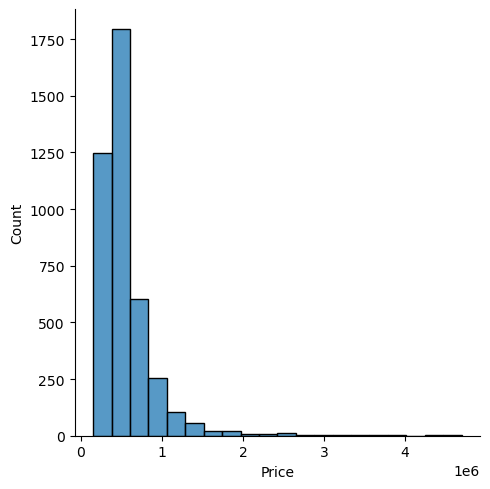

In [40]:
sns.displot(prices, bins = 20)

Distribution quite spread out, let's see what it looks like for houses less than 2m

In [41]:
dfless = x_train[x_train['Price'] <= 2000000]

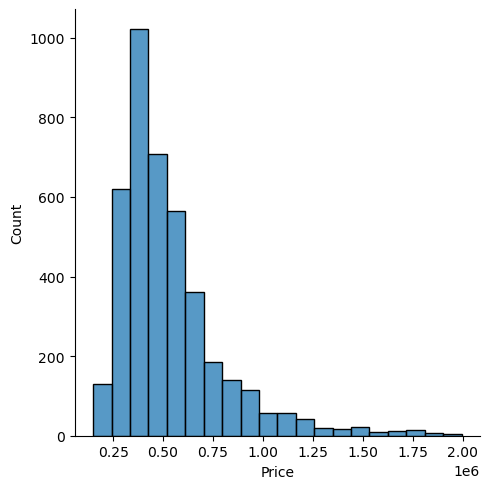

In [42]:
sns.displot(dfless['Price'], bins = 20)

Despite having a reputation for expensive housing, houses don't appear much more expensive than US housing.

## Lot space

In [43]:
lotspace = x_train['Lot size (m2)']
summary(lotspace)

Mean:  746.9414175506269
25%:  151.0
50%:  233.0
75%:  431.0
stdev:  3321.0020311681915
Min:  30.0
Max:  118891.0


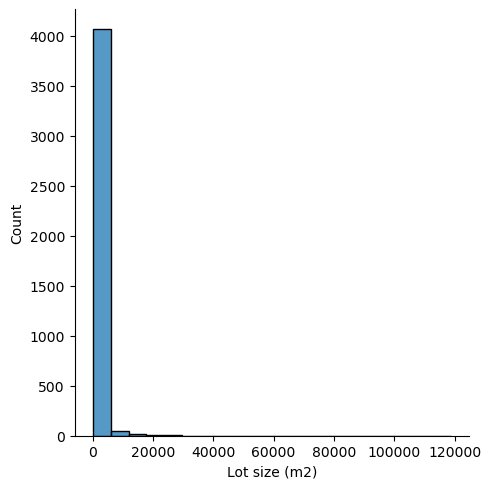

In [44]:
sns.displot(lotspace, bins = 20)

Uhhhhhhh, yea.

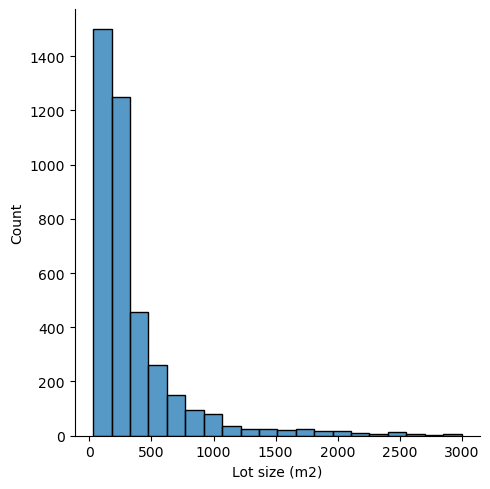

In [45]:
#The top 25% only starts at 400 m^2. 1000 m^2 would make it an estate. Also note that stdev is literally over 3000. Let's do 3000.
lotspaceless = x_train[x_train['Lot size (m2)'] <= 3000]
sns.displot(lotspaceless['Lot size (m2)'], bins=20)

Most houses have a lot of less than 500 sq meters, with the average being only being about as much as the total average US house area.

## Living Space Size

In [46]:
livingspace = x_train['Living space size (m2)']
summary(livingspace)

Mean:  145.59088717454196
25%:  110.0
50%:  130.0
75%:  161.0
stdev:  61.53711852608585
Min:  53.0
Max:  844.0


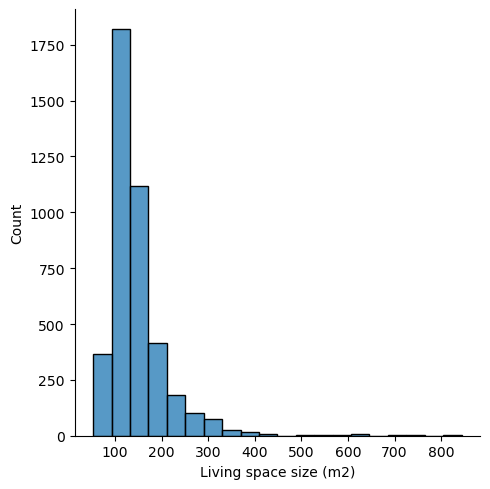

In [47]:
sns.displot(livingspace, bins = 20)

Living space is *tiny* compared to US houses. Basically in a square footage basis.

## Build Type

In [48]:
buildtype = x_train['Build type'].value_counts()

([<matplotlib.patches.Wedge at 0x16b17eef910>],
 [Text(-1.1, 1.3471114790620887e-16, '')])

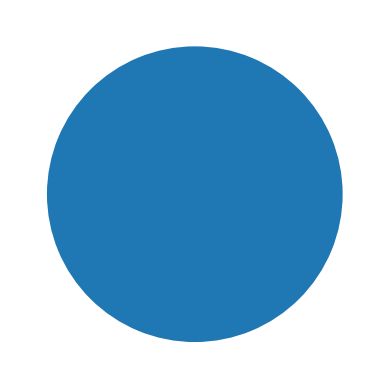

In [49]:
plt.pie(buildtype)

In [50]:
df2 = x_train[x_train['Build type'] == 'Nieuwbouw']
df2

,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden,Estimated neighbourhood price per m2,bedrooms,basement,attic,centrum,park,landelijk,woonwijk,beschutte,front,back,sundeck,patio,side,gardenaround


It appears virutually all houses are used, gonna be pointless to factor in type due to such a small sample size

## House Type

In [51]:
housetype = x_train['House type'].value_counts()

[Text(0, 0, '3378'),
 Text(0, 0, '275'),
 Text(0, 0, '222'),
 Text(0, 0, '129'),
 Text(0, 0, '94'),
 Text(0, 0, '50')]

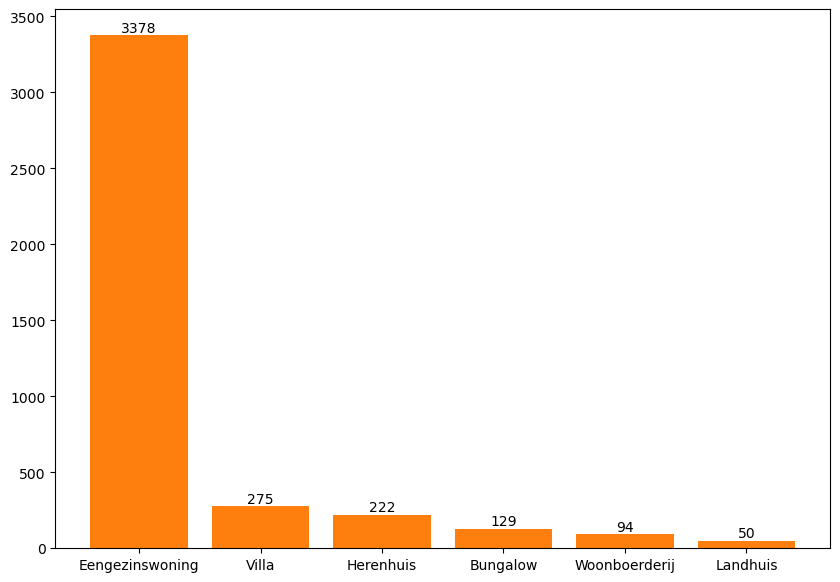

In [52]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(housetype.index, housetype)

bar_container = ax.bar(housetype.index, housetype)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\4067575591.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(housetype.index, labels = housetype.index)


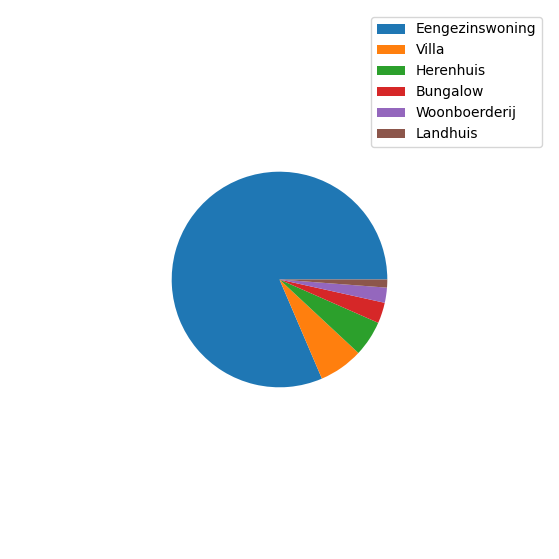

In [53]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(housetype, radius =.5)
ax.legend(housetype.index, labels = housetype.index)

Translation:

Eengezinwoning - Single Family Home

Villa - Villa

Herenhuis - Equivalent to typical American 2 story house

Bungalow - Bungalow

Woonboerderij - Farm house

Landhuis - Estate

Grachtenpand - Amsterdam canal houses you see from any article talking about NL

Woonboot - Boat House

Nothing to really note.

## Roof

In [54]:
rooftype = x_train['Roof'].value_counts()

[Text(0, 0, '2624'),
 Text(0, 0, '485'),
 Text(0, 0, '455'),
 Text(0, 0, '159'),
 Text(0, 0, '137'),
 Text(0, 0, '134'),
 Text(0, 0, '115'),
 Text(0, 0, '39')]

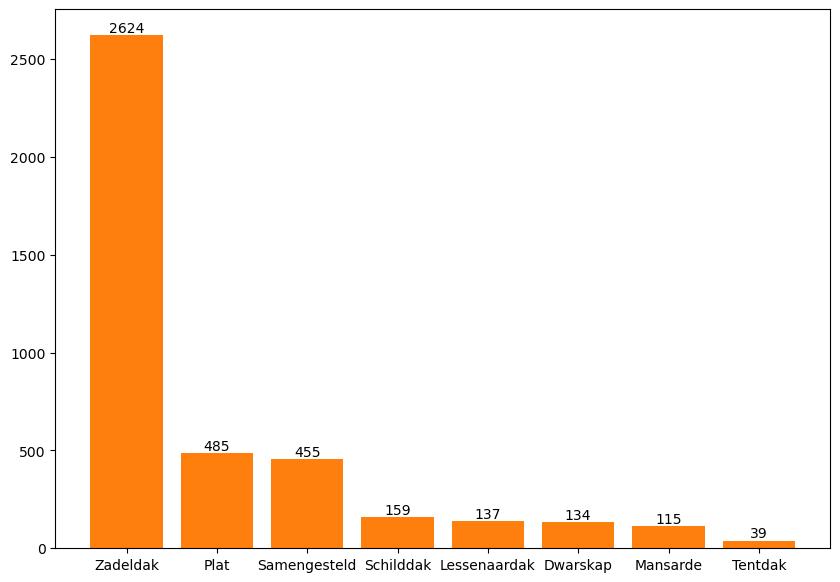

In [55]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(rooftype.index, rooftype)

bar_container = ax.bar(rooftype.index, rooftype)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\1175078014.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(rooftype.index, labels = rooftype.index)


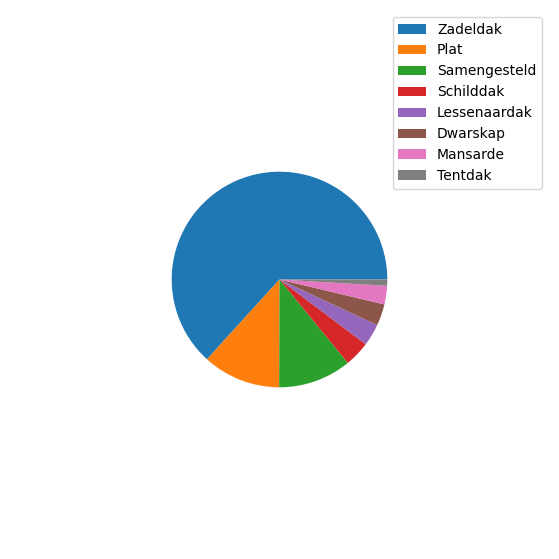

In [56]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(rooftype, radius =.5)
ax.legend(rooftype.index, labels = rooftype.index)

Translation:

Zakeldak - Gable Roof

Plat - Flat

Samengesteld - Together?

Schilddak - Hip Roof

Lessenardak - Mono-pitched roof

Dwarskap - uhhhh, perpindicular zakeldaks?

Mansard - mansard

Tentdak - Steeple

Surprising, thought there would be more plat, but then availability heuristic

## Rooms

In [57]:
roomcount = x_train['Rooms'].value_counts()

[Text(0, 0, '1619'),
 Text(0, 0, '878'),
 Text(0, 0, '820'),
 Text(0, 0, '351'),
 Text(0, 0, '166'),
 Text(0, 0, '152'),
 Text(0, 0, '68'),
 Text(0, 0, '37'),
 Text(0, 0, '21'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '8'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

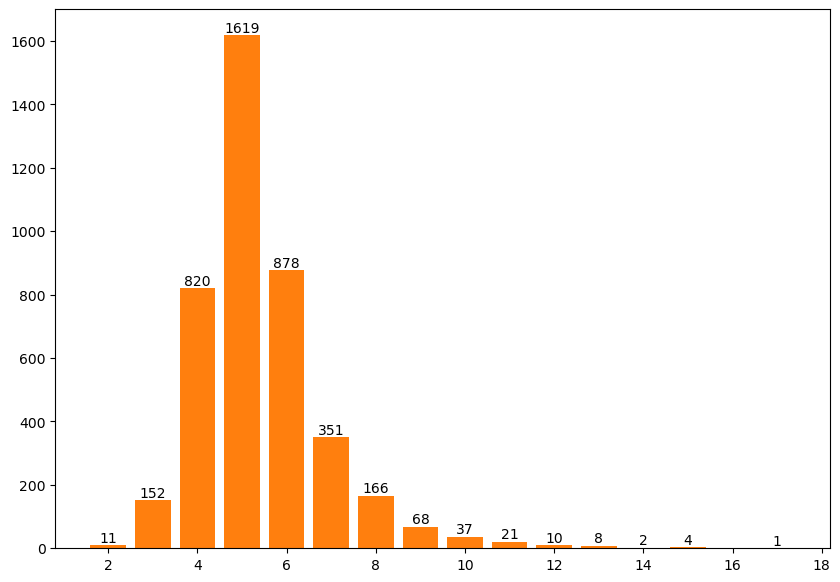

In [58]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(roomcount.index, roomcount)

bar_container = ax.bar(roomcount.index, roomcount)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\1586049771.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(roomcount.index, labels = roomcount.index)


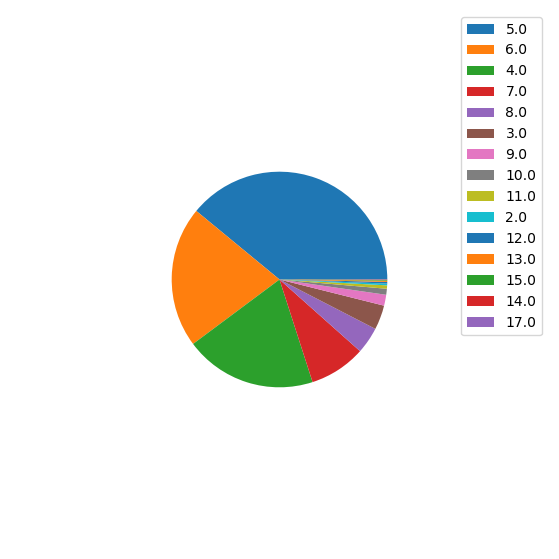

In [59]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(roomcount, radius =.5)
ax.legend(roomcount.index, labels = roomcount.index)

Nothing to note

## Toilets

In [60]:
toilets = x_train['Toilet'].value_counts()

[Text(0, 0, '2813'),
 Text(0, 0, '861'),
 Text(0, 0, '207'),
 Text(0, 0, '204'),
 Text(0, 0, '46'),
 Text(0, 0, '13'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

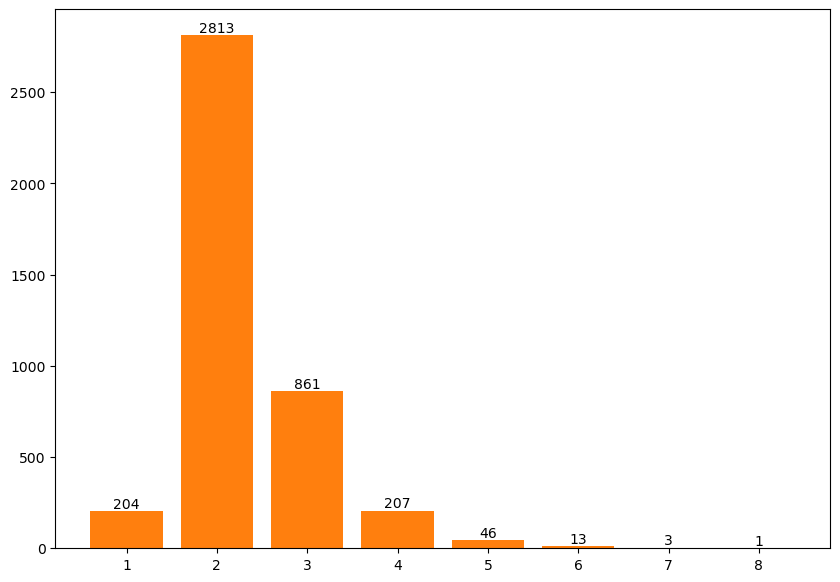

In [61]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(toilets.index, toilets)

bar_container = ax.bar(toilets.index, toilets)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\3349274288.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(toilets.index, labels = toilets.index)


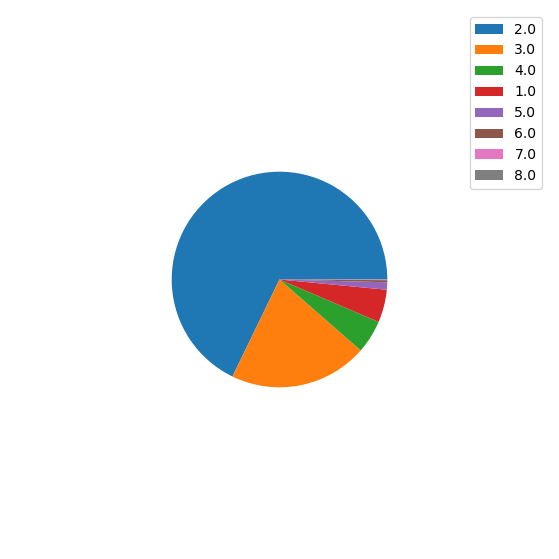

In [62]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(toilets, radius =.5)
ax.legend(toilets.index, labels = toilets.index)

## Floors

In [63]:
floors = x_train['Floors'].value_counts()

[Text(0, 0, '2230'),
 Text(0, 0, '1751'),
 Text(0, 0, '82'),
 Text(0, 0, '74'),
 Text(0, 0, '9'),
 Text(0, 0, '2')]

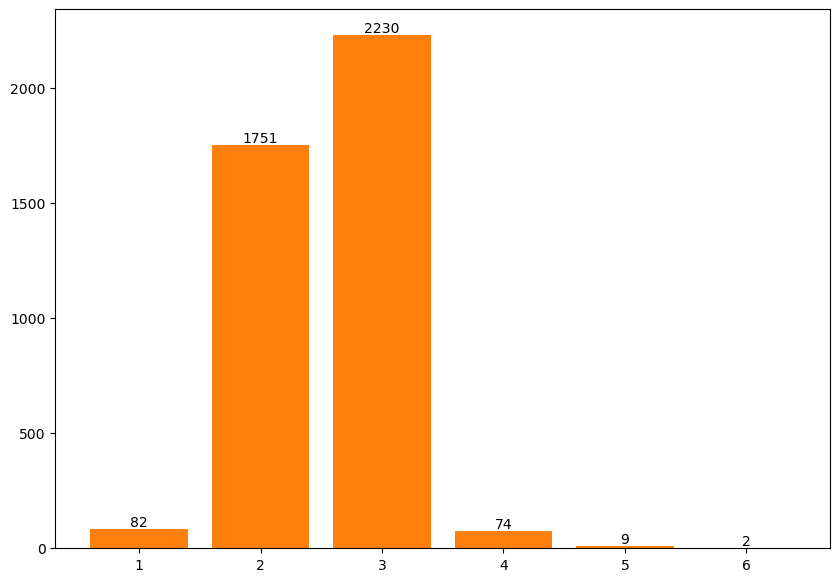

In [64]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(floors.index, floors)

bar_container = ax.bar(floors.index, floors)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\1078167476.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(floors.index, labels = floors.index)


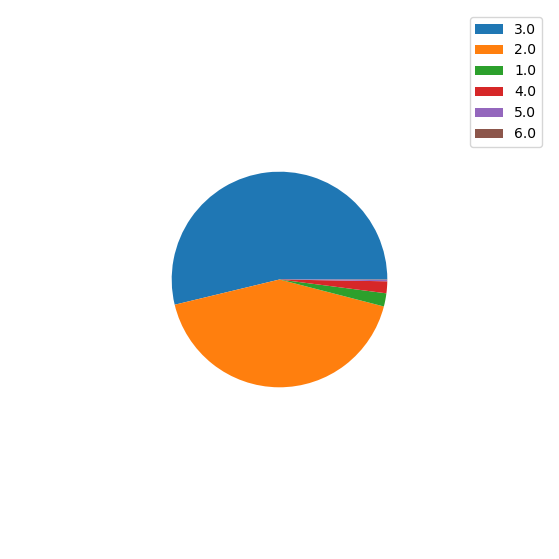

In [65]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(floors, radius =.5)
ax.legend(floors.index, labels = floors.index)

I'm surprised with how many houses have 3 stories, especially since I'm used to 2 story houses in the US and my Oma's neighborhood

## Energy Label

In [66]:
energy = x_train['Energy label'].value_counts()
summary(x_train['Energy label'])

Mean:  6.920443587270974
25%:  6.0
50%:  7.0
75%:  8.0
stdev:  1.7411954006624852
Min:  1.0
Max:  11.0


[Text(0, 0, '1181'),
 Text(0, 0, '940'),
 Text(0, 0, '716'),
 Text(0, 0, '493'),
 Text(0, 0, '304'),
 Text(0, 0, '217'),
 Text(0, 0, '207'),
 Text(0, 0, '61'),
 Text(0, 0, '16'),
 Text(0, 0, '11'),
 Text(0, 0, '2')]

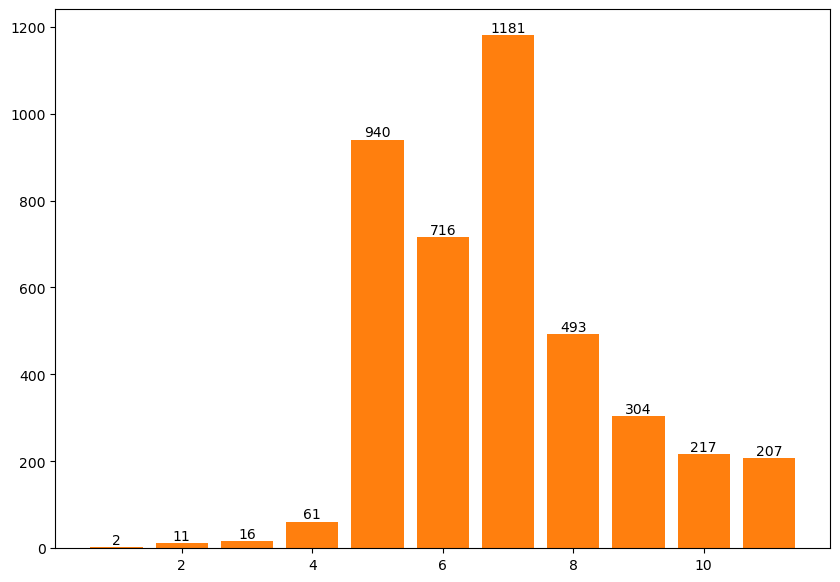

In [67]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(energy.index, energy)

bar_container = ax.bar(energy.index, energy)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\3341924260.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(energy.index, labels = energy.index)


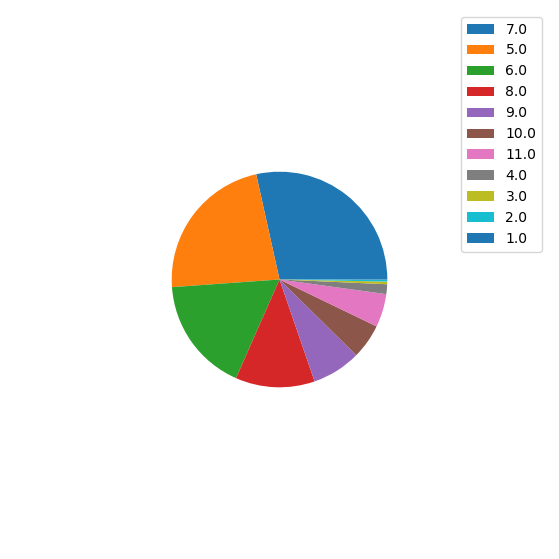

In [68]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(energy, radius =.5)
ax.legend(energy.index, labels = energy.index)

Translation: 

'A++++': 1,

'A+++': 2,

'A++': 3,

'A+': 4,

'A': 5,

'B': 6,

'C': 7,

'D': 8,

'E': 9,

'F': 10,

'G': 11

## Neighborhood price

In [69]:
neighborhood = x_train['Estimated neighbourhood price per m2']
summary(neighborhood)

Mean:  102.38973143683704
25%:  2.065
50%:  3.4905
75%:  6.82
stdev:  243.82683209157997
Min:  1.0
Max:  995.0


It appears there isn't a single value below 1, however looking at the values in the table, there's quite a fair bit of nans. I have suspicions that any value below 1 returned nans when they were creating the table.

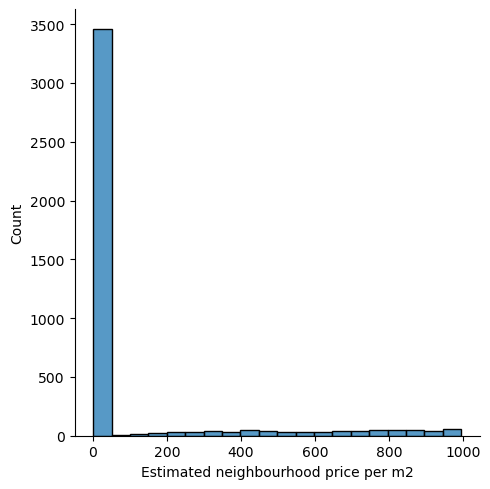

In [70]:
sns.displot(neighborhood, bins = 20)

Yay! More unreadable histograms!

In [71]:
smallneighborhood = df[df['Estimated neighbourhood price per m2'] <= 20]
summary(smallneighborhood['Estimated neighbourhood price per m2'])

Mean:  3.5726465346534653
25%:  1.85
50%:  2.895
75%:  4.455
stdev:  2.4256283630752917
Min:  1.0
Max:  17.06


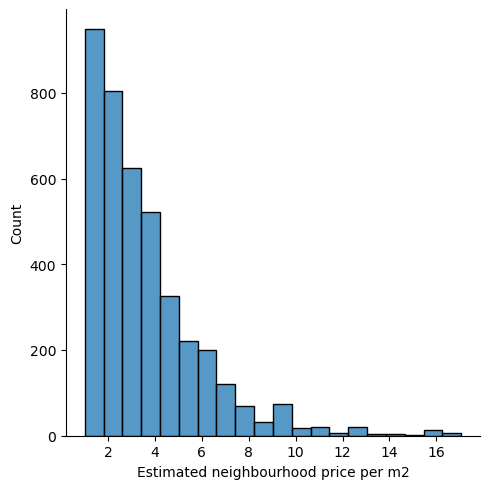

In [72]:
sns.displot(smallneighborhood['Estimated neighbourhood price per m2'], bins = 20)

In [73]:
tinyneighborhood = df[df['Estimated neighbourhood price per m2'] <= 5]
summary(tinyneighborhood['Estimated neighbourhood price per m2'])

Mean:  2.599177164132796
25%:  1.6575
50%:  2.45
75%:  3.4425
stdev:  1.0838678836245401
Min:  1.0
Max:  5.0


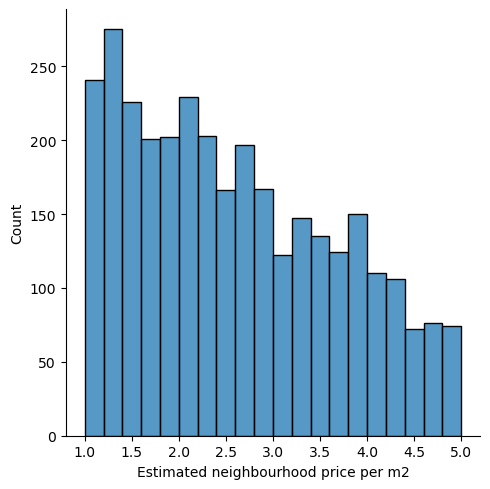

In [74]:
sns.displot(tinyneighborhood['Estimated neighbourhood price per m2'], bins = 20)

I would assume it's thousands per sq meter of living space.

## Bedrooms

In [75]:
bedrooms = x_train['bedrooms'].value_counts()

In [76]:
summary(x_train['bedrooms'])

Mean:  3.8500482160077145
25%:  3.0
50%:  4.0
75%:  4.0
stdev:  1.042807249719108
Min:  1.0
Max:  10.0


[Text(0, 0, '1737'),
 Text(0, 0, '1246'),
 Text(0, 0, '647'),
 Text(0, 0, '260'),
 Text(0, 0, '174'),
 Text(0, 0, '40'),
 Text(0, 0, '22'),
 Text(0, 0, '16'),
 Text(0, 0, '5'),
 Text(0, 0, '1')]

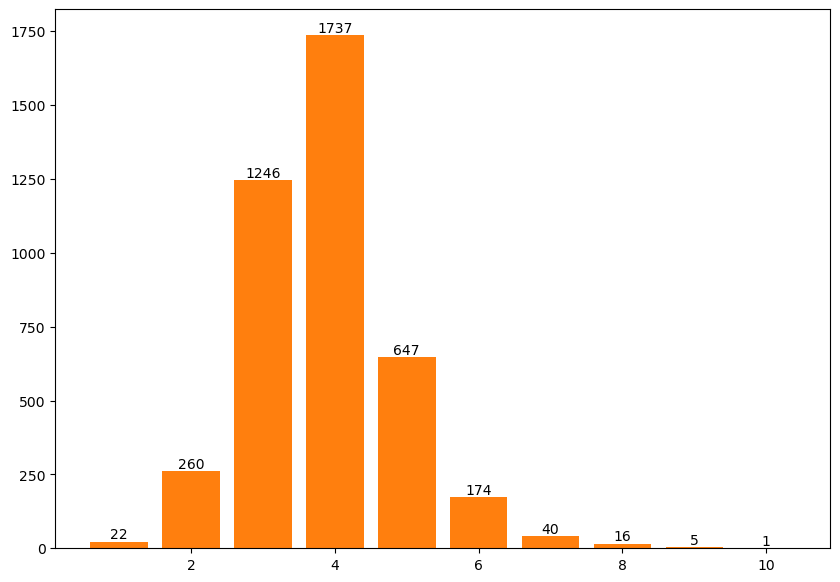

In [77]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(bedrooms.index, bedrooms)

bar_container = ax.bar(bedrooms.index, bedrooms)
ax.bar_label(bar_container)

## Basement

In [78]:
basement = x_train['basement'].value_counts()

[Text(0, 0, '3665'), Text(0, 0, '483')]

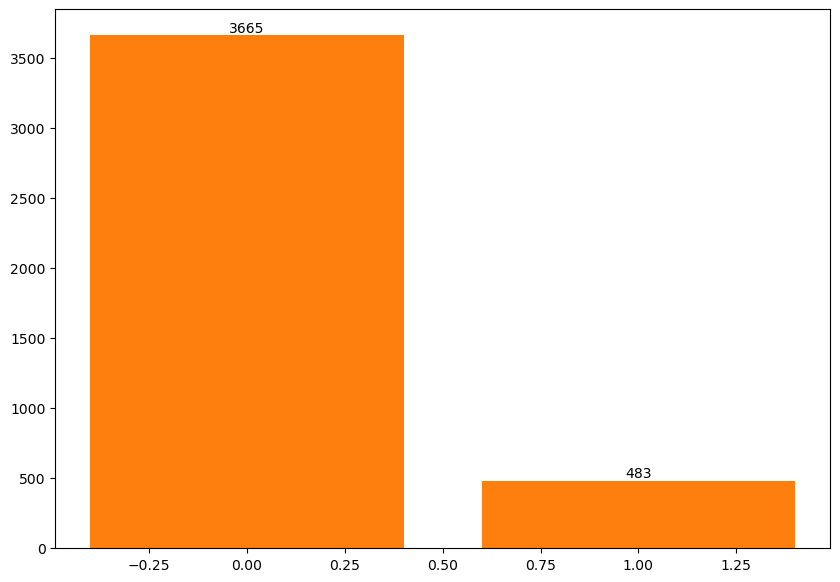

In [79]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(basement.index, basement)

bar_container = ax.bar(basement.index, basement)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\674671688.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(basement.index, labels = basement.index)


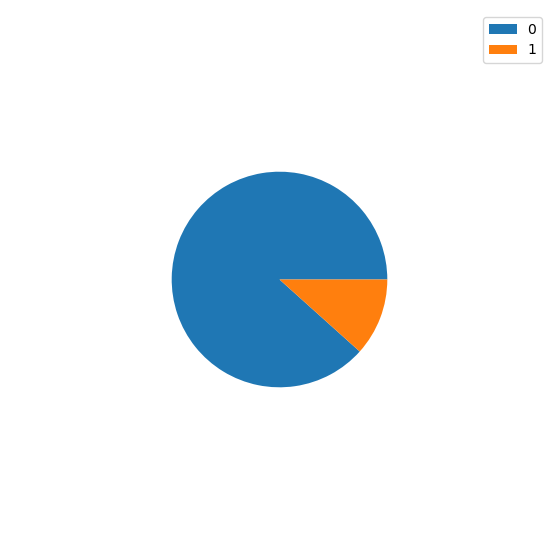

In [80]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(basement, radius =.5)
ax.legend(basement.index, labels = basement.index)

## Attic

In [81]:
attic = x_train['attic'].value_counts()

[Text(0, 0, '3344'), Text(0, 0, '804')]

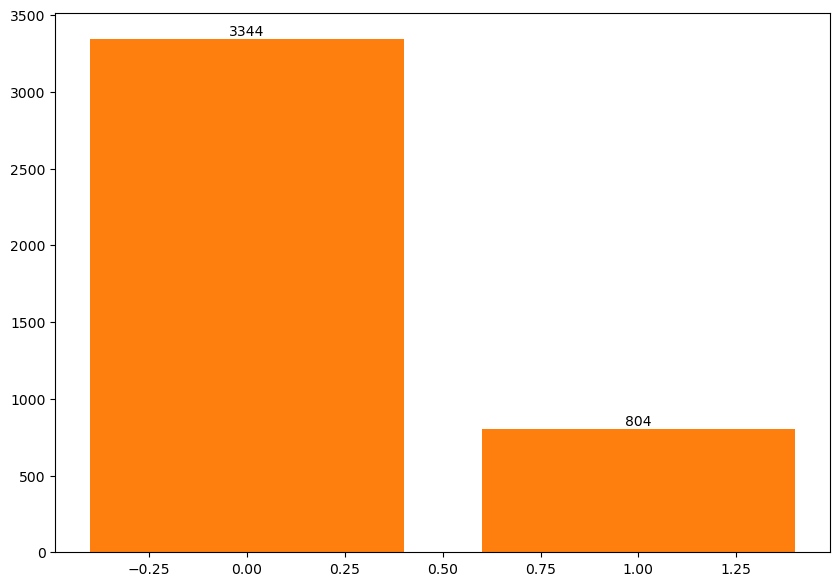

In [82]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(attic.index, attic)

bar_container = ax.bar(attic.index, attic)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\2671918228.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(attic.index, labels = attic.index)


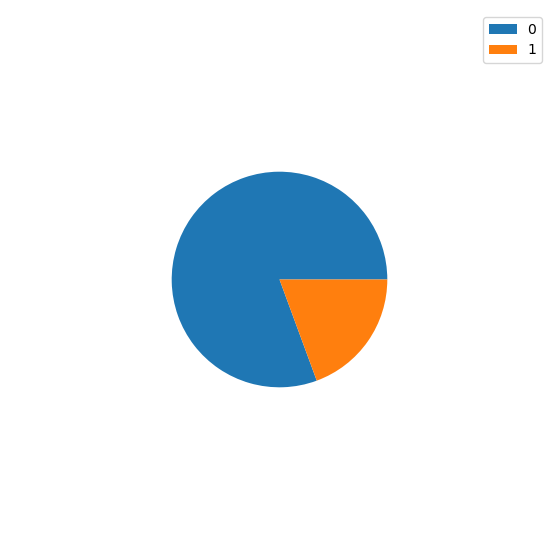

In [83]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(attic, radius =.5)
ax.legend(attic.index, labels = attic.index)

## Front

In [84]:
front = x_train['front'].value_counts()

[Text(0, 0, '2873'), Text(0, 0, '1275')]

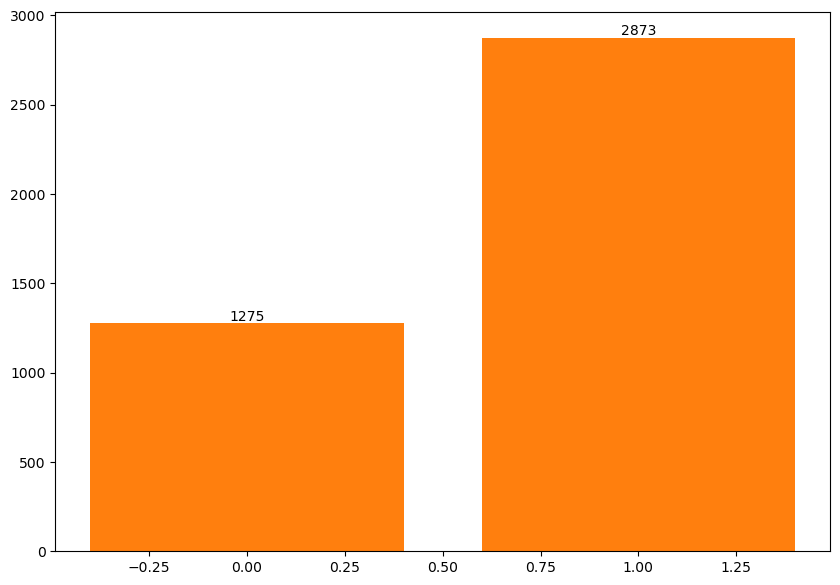

In [85]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(front.index, front)

bar_container = ax.bar(front.index, front)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\1813917985.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(front.index, labels = front.index)


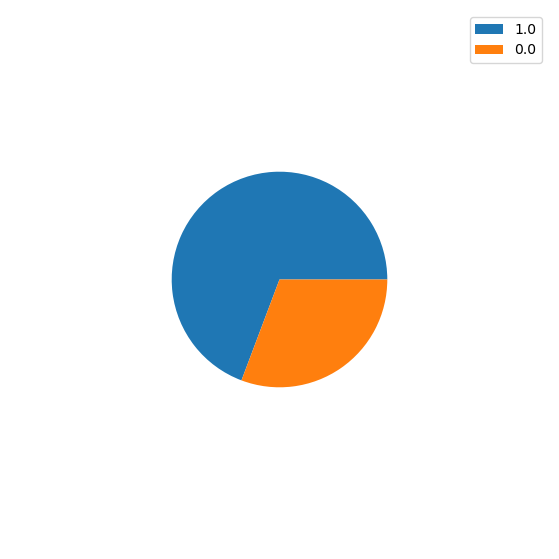

In [86]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(front, radius =.5)
ax.legend(front.index, labels = front.index)

Dutchmen know that lawns are pointless to have

## Back

In [87]:
back = x_train['back'].value_counts()

[Text(0, 0, '3419'), Text(0, 0, '729')]

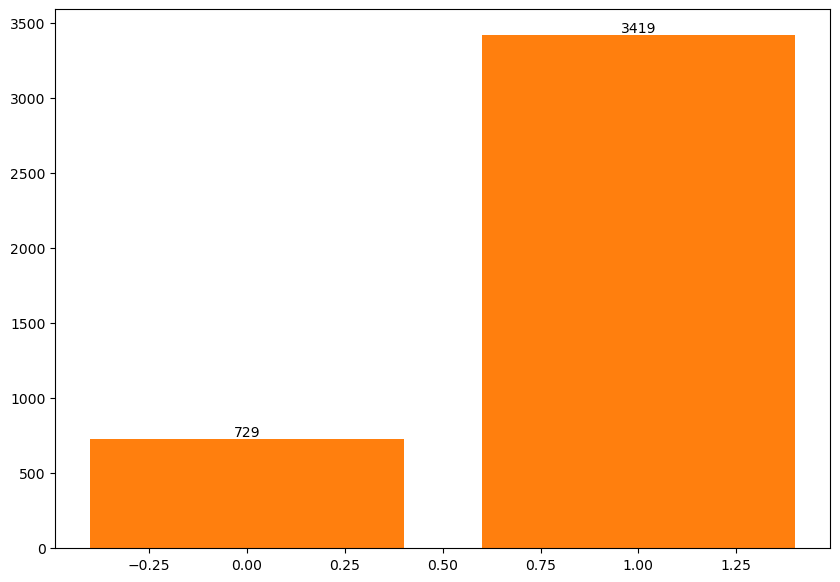

In [88]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(back.index, back)

bar_container = ax.bar(back.index, back)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\765265924.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(back.index, labels = back.index)


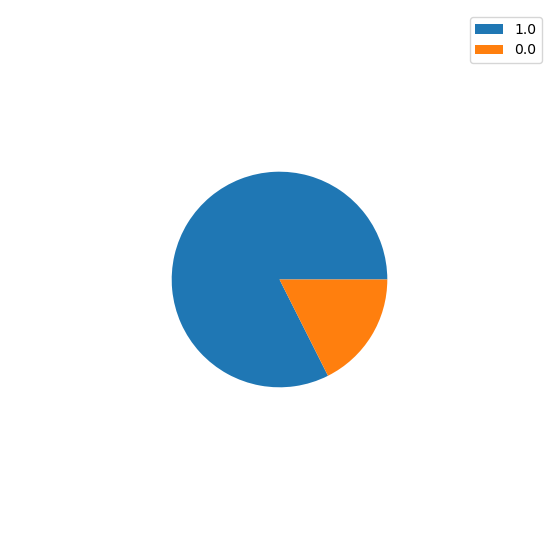

In [89]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(back, radius =.5)
ax.legend(back.index, labels = back.index)

Personal experience: there's more patio/garden than lawn in the yard

## Sundeck

In [90]:
sundeck = x_train['sundeck'].value_counts()

[Text(0, 0, '3927'), Text(0, 0, '221')]

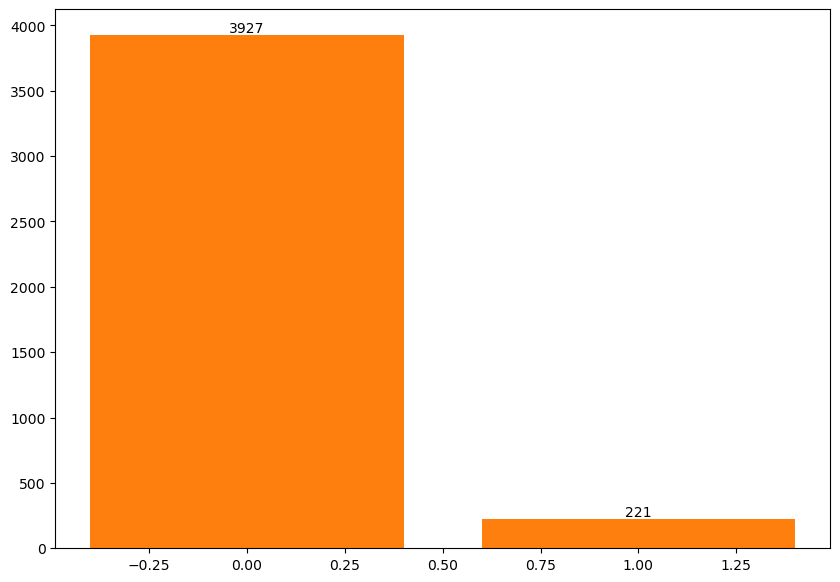

In [91]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(sundeck.index, sundeck)

bar_container = ax.bar(sundeck.index, sundeck)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\2539380337.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(sundeck.index, labels = sundeck.index)


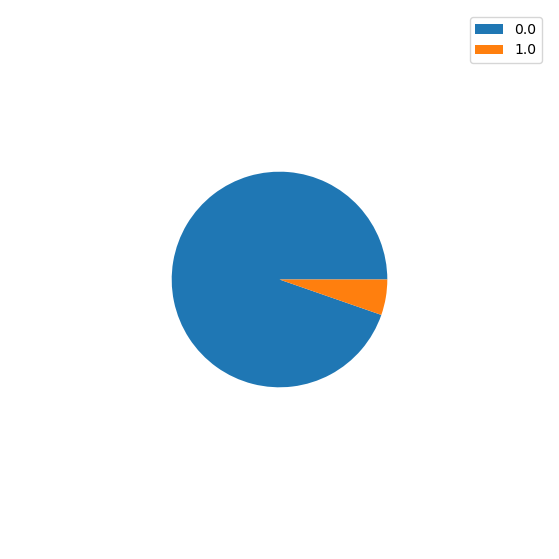

In [92]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(sundeck, radius =.5)
ax.legend(sundeck.index, labels = sundeck.index)

## Patio

In [93]:
patio = x_train['patio'].value_counts()

[Text(0, 0, '4097'), Text(0, 0, '51')]

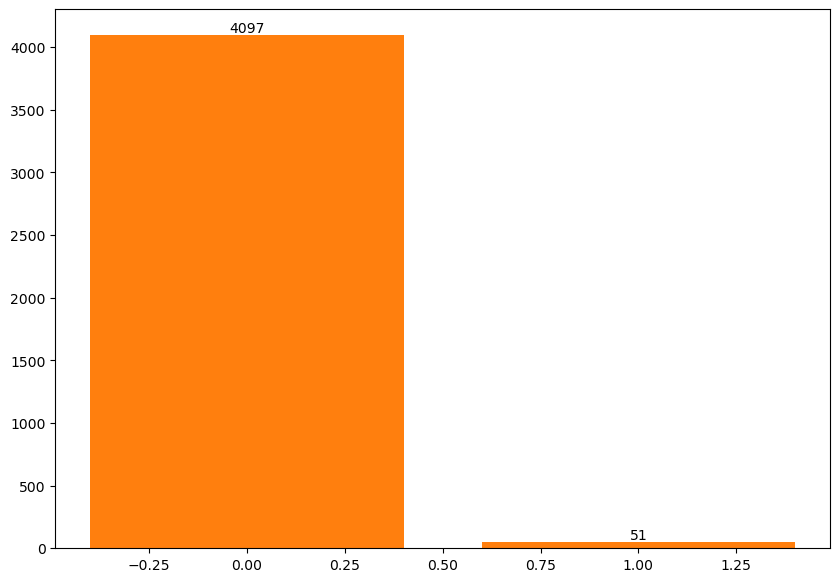

In [94]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(patio.index, patio)

bar_container = ax.bar(patio.index, patio)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\967497088.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(patio.index, labels = patio.index)


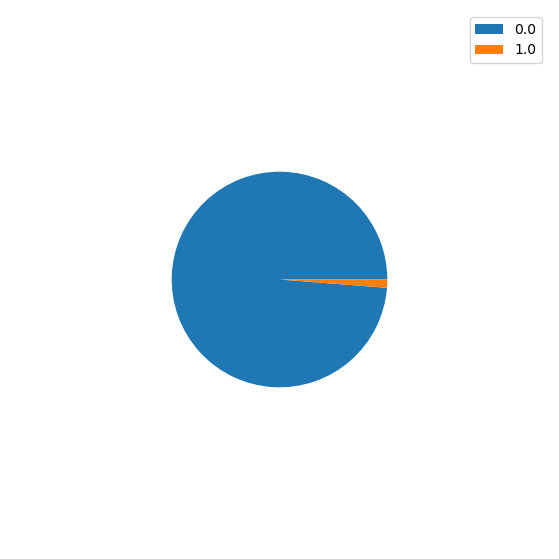

In [95]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(patio, radius =.5)
ax.legend(patio.index, labels = patio.index)

## Side Yard

In [96]:
side = x_train['side'].value_counts()

[Text(0, 0, '3278'), Text(0, 0, '870')]

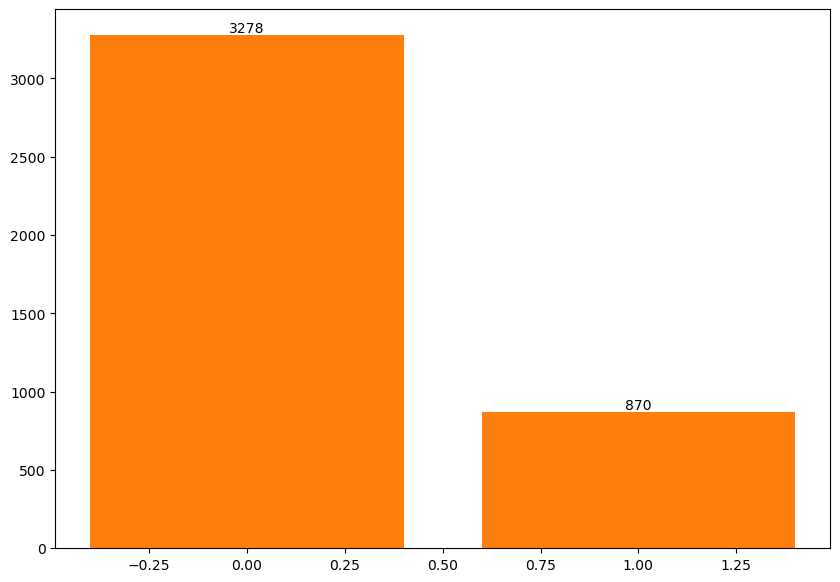

In [97]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(side.index, side)

bar_container = ax.bar(side.index, side)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\3325809211.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(side.index, labels = side.index)


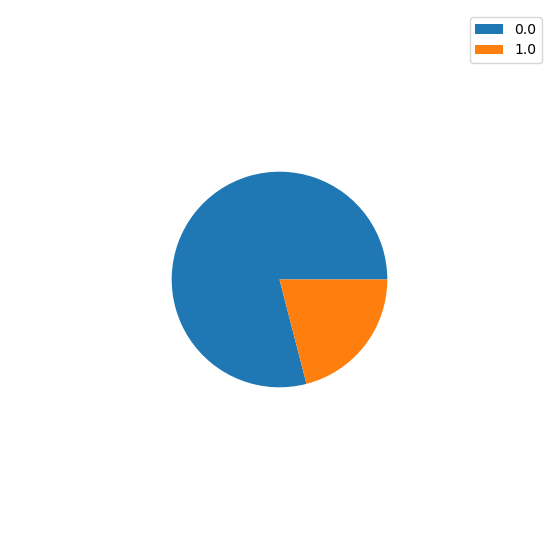

In [98]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(side, radius =.5)
ax.legend(side.index, labels = side.index)

## Surrounding garden

In [99]:
gardenround = x_train['gardenaround'].value_counts()

[Text(0, 0, '3459'), Text(0, 0, '689')]

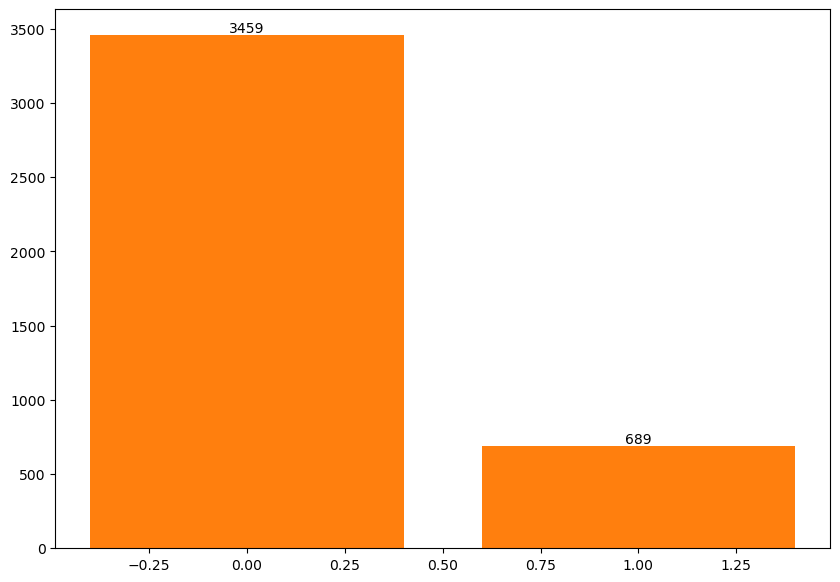

In [100]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(gardenround.index, gardenround)

bar_container = ax.bar(gardenround.index, gardenround)
ax.bar_label(bar_container)

C:\Users\nicks\AppData\Local\Temp\ipykernel_20260\3662425830.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(gardenround.index, labels = gardenround.index)


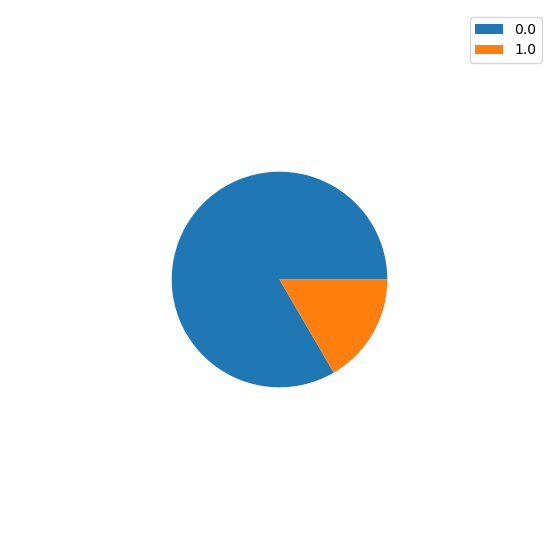

In [101]:
fig, ax = plt.subplots(figsize = (10, 7))

ax.pie(gardenround, radius =.5)
ax.legend(gardenround.index, labels = gardenround.index)

# Correlations

In [102]:
x_traincheaper = x_train[x_train['Price']< 1500000]

We'll be using the cheaper dataset for easier visualization, plus only about 2% of items are above that range.

In [103]:
def polyline(x,num):
    f = np.polyfit(x, x_traincheaper['Price'], num)
    p = np.poly1d(f)
    polyrange = np.linspace(min(x), max(x))
    print(p)
    plt.plot(x, x_traincheaper['Price'], '.', polyrange, p(polyrange))

In [104]:
def polyline2(x,num):
    f = np.polyfit(x, x_train['Price'], num)
    p = np.poly1d(f)
    polyrange = np.linspace(min(x), max(x))
    print(p)
    plt.plot(x, x_train['Price'], '.', polyrange, p(polyrange))

To visualize graph with polynomial function

In [105]:
def test(x,num):
    f = np.polyfit(x, x_train['Price'], num)
    p = np.poly1d(f)
    fit = p(x)
    plt.plot(x_train['Price'], fit, '.')
    r = np.corrcoef(x_train['Price'], fit)
    print(r[0,1])

See how much more polynomial function reperesents better than typical linear regression.

I basically just plug the x in as x and it predicts the price and outputs correlation between predicted price and actual price.

In [106]:
def swap(x,num):
    f = np.polyfit(x, x_train['Price'], num)
    p = np.poly1d(f)
    fit = p(x)
    x = fit

Replaces x values with the prices, will prolly have to preserve the original number if I'm to compare between variables, but it should work fine with predicted price for now.

## Lot size

<AxesSubplot:xlabel='Lot size (m2)', ylabel='Price'>

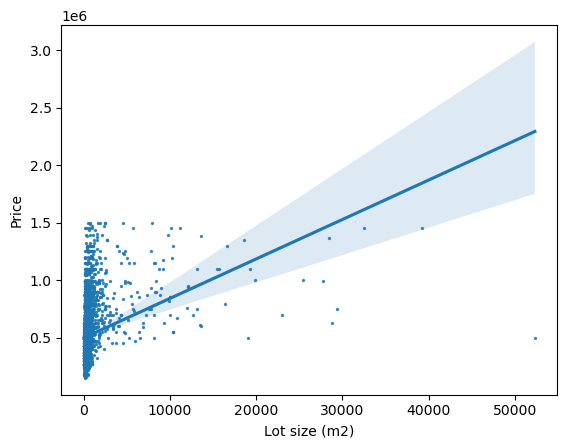

In [107]:
sns.regplot(x = 'Lot size (m2)', y= 'Price', data = x_traincheaper, scatter_kws = {'s': 2})

<AxesSubplot:xlabel='Lot size (m2)', ylabel='Price'>

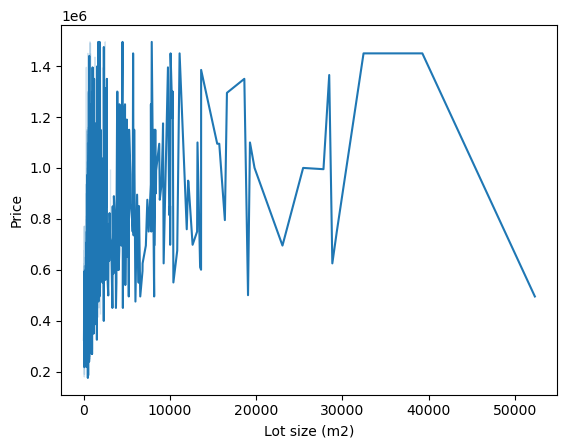

In [108]:
sns.lineplot(x = 'Lot size (m2)', y= 'Price', data = x_traincheaper)

In [109]:
r = np.corrcoef(x_train['Lot size (m2)'], x_train['Price'])
r[0,1]

0.31733017139860753

<AxesSubplot:xlabel='Lot size (m2)', ylabel='Price'>

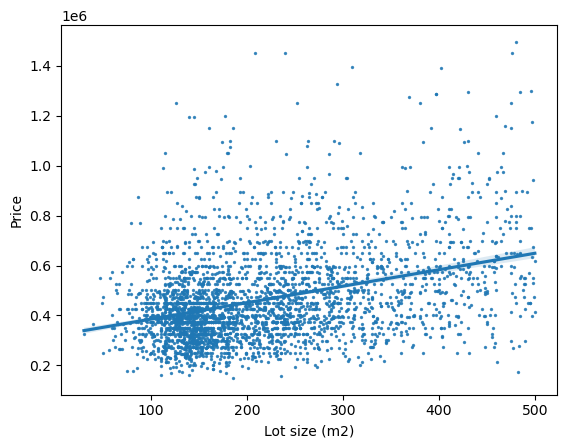

In [110]:
dfsmaller = x_train[x_train['Lot size (m2)'] <= 500]
dfsmaller = dfsmaller[dfsmaller['Price'] <= 1500000]

sns.regplot(x = 'Lot size (m2)', y= 'Price', data = dfsmaller, scatter_kws = {'s': 2})

<AxesSubplot:xlabel='Lot size (m2)', ylabel='Price'>

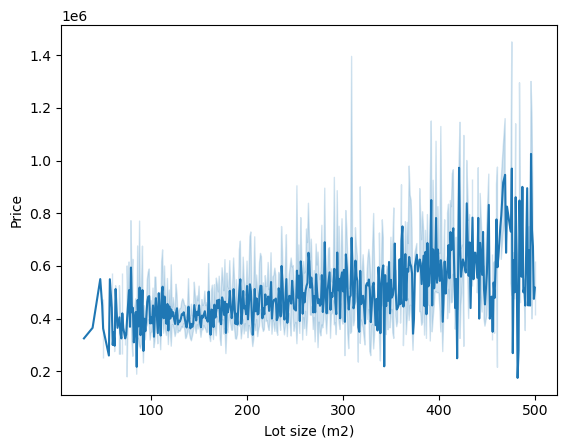

In [111]:
sns.lineplot(x = 'Lot size (m2)', y= 'Price', data = dfsmaller)

In [112]:

r = np.corrcoef(dfsmaller['Lot size (m2)'], dfsmaller['Price'])
r[0,1]

0.36614663033417166

Relationship looks mostly linear, however correlation appear to get quite hazy when it gets into more estate sizes.

## Living space size

<AxesSubplot:xlabel='Living space size (m2)', ylabel='Price'>

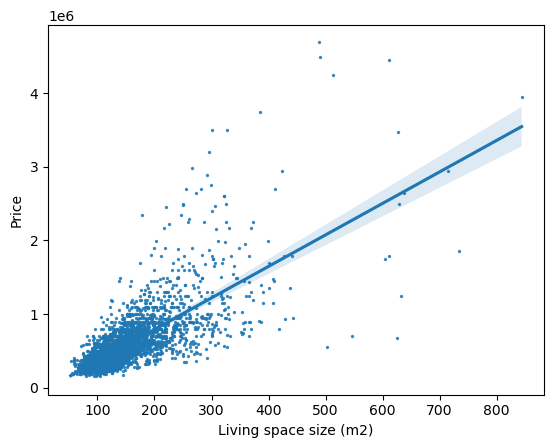

In [113]:
sns.regplot(x = 'Living space size (m2)', y= 'Price', data = x_train, scatter_kws = {'s': 2})

<AxesSubplot:xlabel='Living space size (m2)', ylabel='Price'>

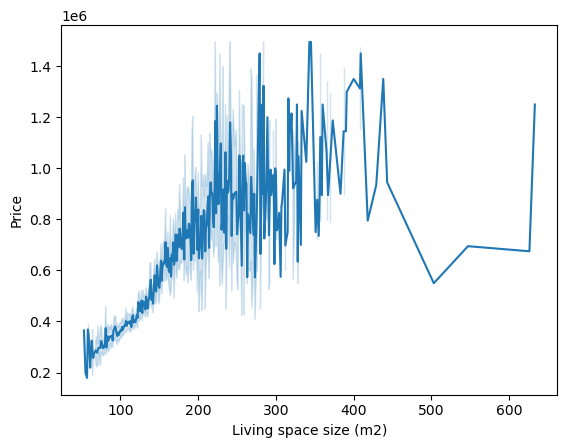

In [114]:
sns.lineplot(x = 'Living space size (m2)', y= 'Price', data = x_traincheaper)

In [115]:
r = np.corrcoef(x_train['Living space size (m2)'], x_train['Price'])
r[0,1]

0.7377369836440697

<AxesSubplot:xlabel='Living space size (m2)', ylabel='Price'>

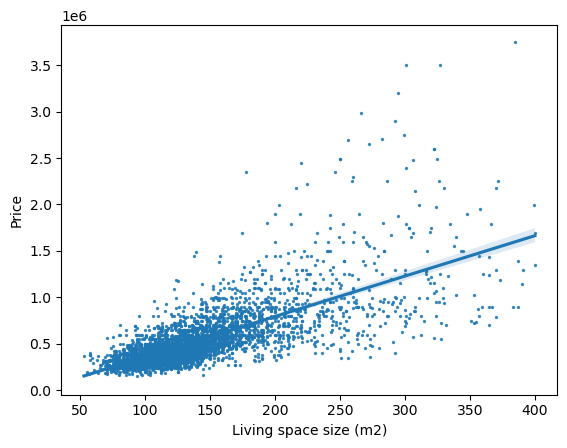

In [116]:
dfsmaller = x_train[x_train['Living space size (m2)'] <= 400]
sns.regplot(x = 'Living space size (m2)', y= 'Price', data = dfsmaller, scatter_kws = {'s': 2})

In [117]:
r = np.corrcoef(dfsmaller['Living space size (m2)'], dfsmaller['Price'])
r[0,1]

0.7167759008777341

<AxesSubplot:xlabel='Living space size (m2)', ylabel='Price'>

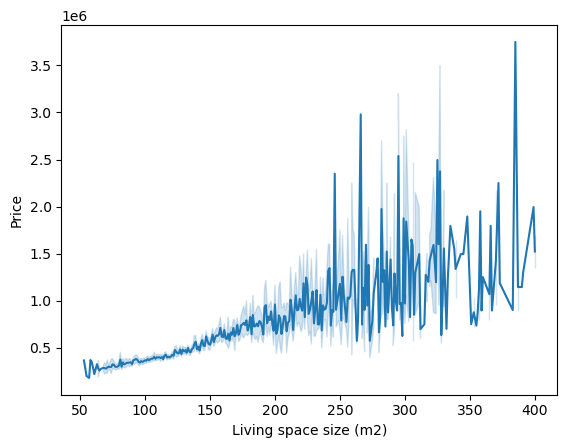

In [118]:
sns.lineplot(x = 'Living space size (m2)', y= 'Price', data = dfsmaller)

           3         2
-0.002755 x + 2.039 x + 3920 x - 4.957e+04


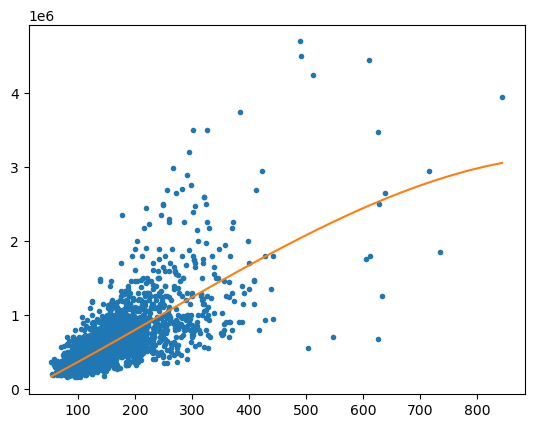

In [119]:
polyline2(x_train['Living space size (m2)'], 3)

Extremely strong relationship, could reasonably predict house price with that alone.

## Build year

<AxesSubplot:xlabel='Build year', ylabel='Price'>

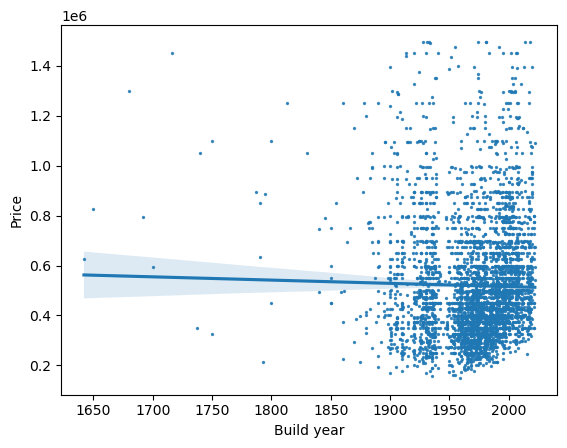

In [120]:
sns.regplot(x = 'Build year', y= 'Price', data = x_traincheaper, scatter_kws = {'s': 2})

<AxesSubplot:xlabel='Build year', ylabel='Price'>

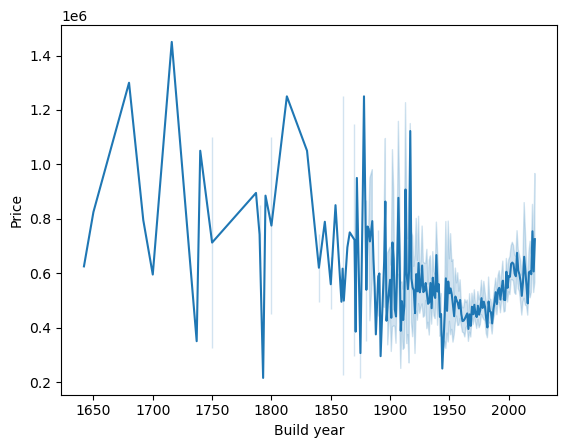

In [121]:
sns.lineplot(x = 'Build year', y= 'Price', data = x_traincheaper)

In [122]:
r = np.corrcoef(x_train['Build year'], x_train['Price'])
r[0,1]

-0.013295752180165637

In [123]:
dfnewer = x_train[x_train['Build year'] >= 1950]
# dfnewer = dfnewer[dfnewer['Price'] <= 1000000]

<AxesSubplot:xlabel='Build year', ylabel='Price'>

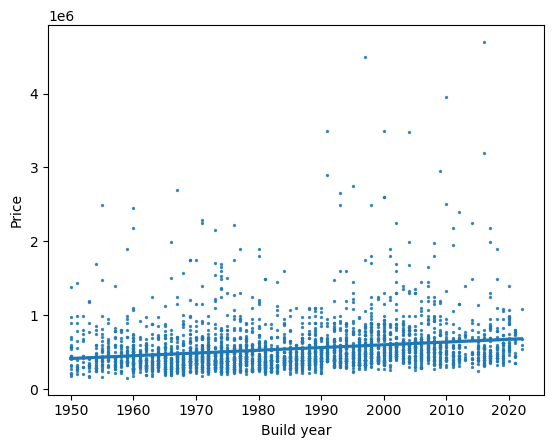

In [124]:
sns.regplot(x = 'Build year', y= 'Price', data = dfnewer, scatter_kws = {'s': 2})

In [125]:
r = np.corrcoef(dfnewer['Build year'], dfnewer['Price'])
r[0,1]

0.19623688438826936

Correlation is somewhat there after the year 1950, however there is no correlation when using all years. Very duly noted

## House Type

[Text(0, 0, 'Eengezinswoning'),
 Text(1, 0, 'Herenhuis'),
 Text(2, 0, 'Bungalow'),
 Text(3, 0, 'Villa'),
 Text(4, 0, 'Woonboerderij'),
 Text(5, 0, 'Landhuis')]

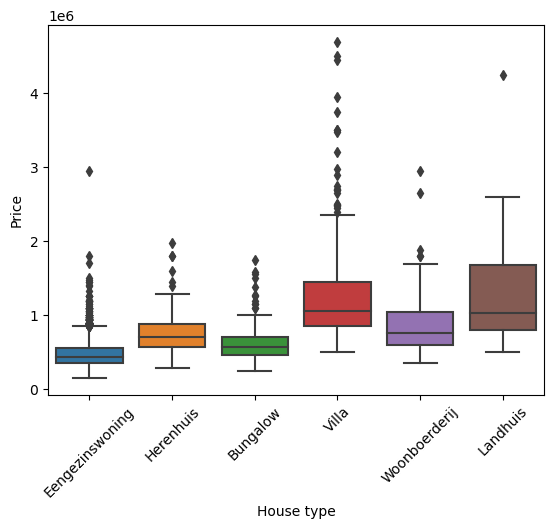

In [126]:
plot = sns.boxplot(x = 'House type', y= 'Price', data = x_train)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)

Big houses more expensive, unsurprising.

## Roof

[Text(0, 0, 'Zadeldak'),
 Text(1, 0, 'Dwarskap'),
 Text(2, 0, 'Plat'),
 Text(3, 0, 'Schilddak'),
 Text(4, 0, 'Samengesteld'),
 Text(5, 0, 'Lessenaardak'),
 Text(6, 0, 'Mansarde'),
 Text(7, 0, 'Tentdak')]

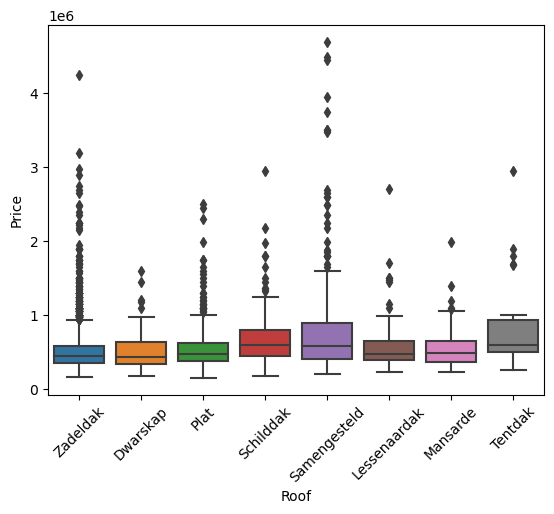

In [127]:
plot = sns.boxplot(x = 'Roof', y= 'Price', data = x_train)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45)

## Rooms

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

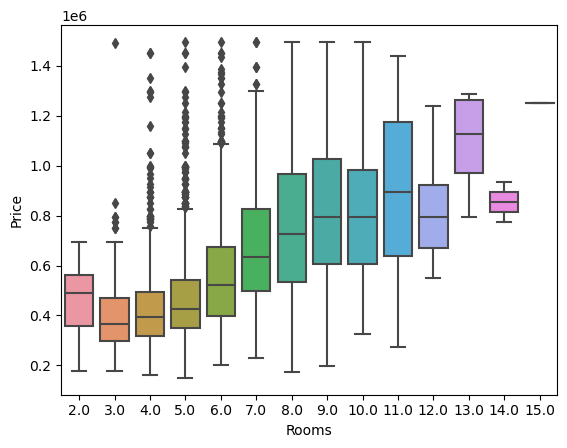

In [128]:
sns.boxplot(x = 'Rooms', y= 'Price', data = x_traincheaper)

In [129]:
r = np.corrcoef(x_train['Rooms'], x_train['Price'])
r[0,1]

0.47319944667532804

       3             2
-1372 x + 3.101e+04 x - 1.386e+05 x + 5.708e+05


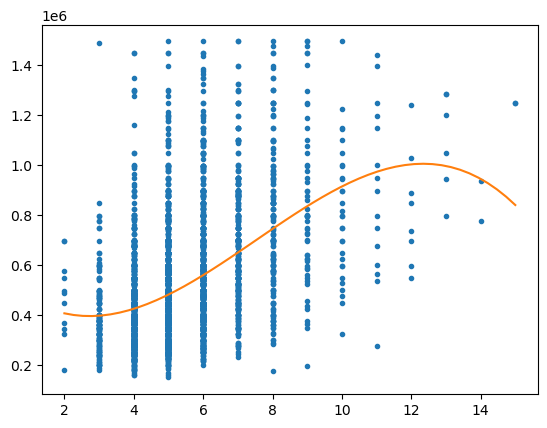

In [130]:
polyline(x_traincheaper['Rooms'], 3)

0.4877625903629013


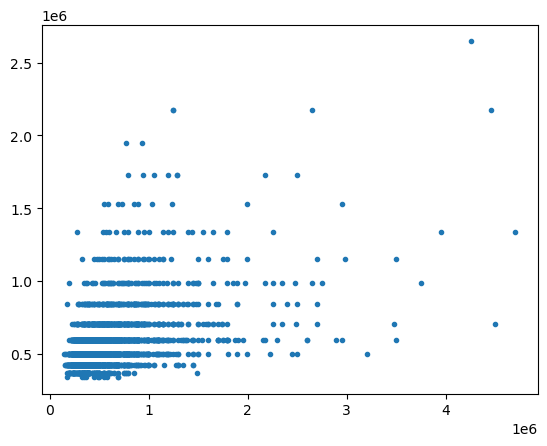

In [131]:
test(x_train['Rooms'], 3) 

In [132]:
#This bit of code replaces the original x values with the polyline values. Original swap function doesn't work apparently
f = np.polyfit(x_train['Rooms'], x_train['Price'], 3)
p = np.poly1d(f)
fit = p(x_train['Rooms'])
x_train['Rooms'] = fit

## Toilets

<AxesSubplot:xlabel='Toilet', ylabel='Price'>

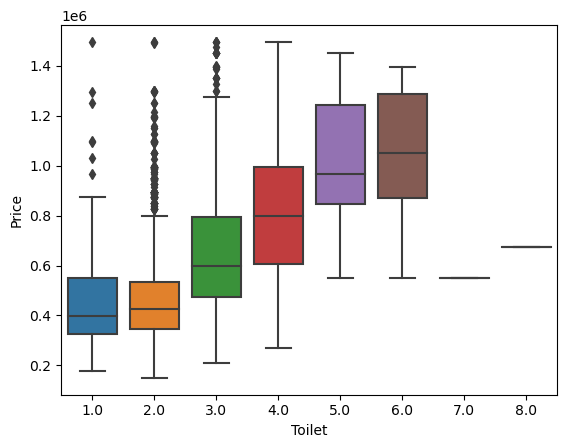

In [133]:
sns.boxplot(x = 'Toilet', y= 'Price', data = x_traincheaper)

In [134]:
r = np.corrcoef(x_train['Toilet'], x_train['Price'])
r[0,1]

0.5123913379692594

            3             2
-1.588e+04 x + 1.665e+05 x - 3.595e+05 x + 6.436e+05


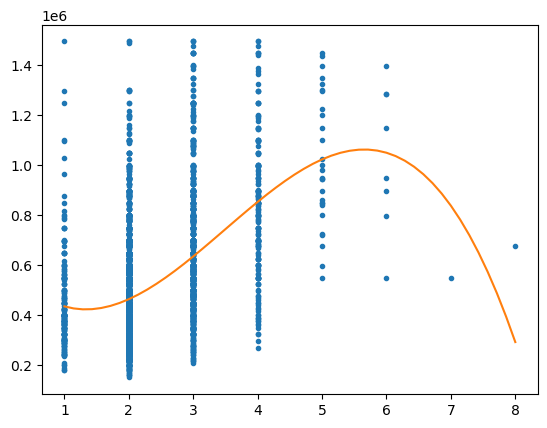

In [135]:
polyline(x_traincheaper['Toilet'], 3)

Yea, I know the 7 and 8 are kinda screwing it up a bit, but it works better with up to 6.

0.5439525935006637


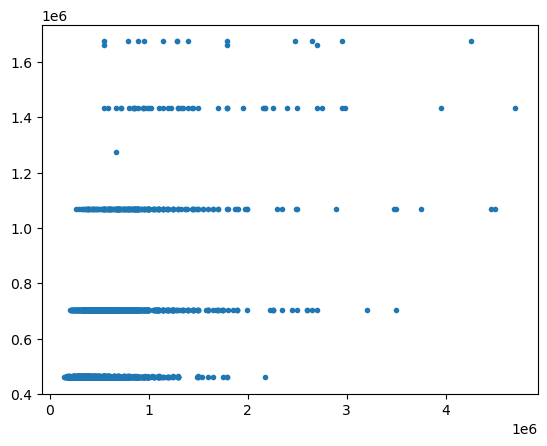

In [136]:
test(x_train['Toilet'], 3)

In [137]:
f = np.polyfit(x_train['Toilet'], x_train['Price'], 3)
p = np.poly1d(f)
fit = p(x_train['Toilet'])
x_train['Toilet'] = fit

## Floors

<AxesSubplot:xlabel='Floors', ylabel='Price'>

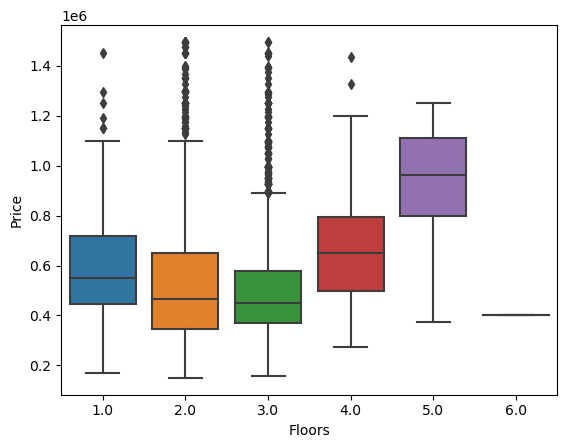

In [138]:
sns.boxplot(x = 'Floors', y= 'Price', data = x_traincheaper)

In [139]:
r = np.corrcoef(x_train['Floors'], x_train['Price'])
r[0,1]

-0.0022569385513611442

           2
5.648e+04 x - 2.961e+05 x + 8.886e+05


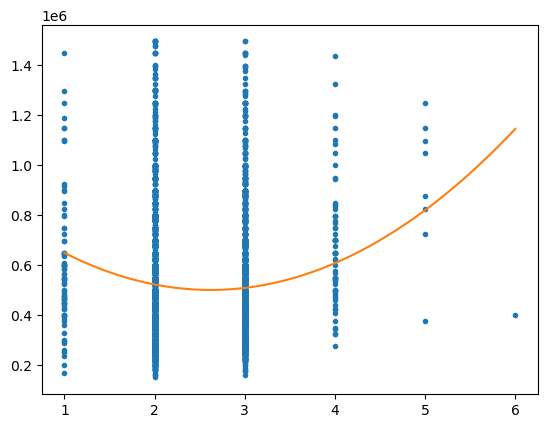

In [140]:
polyline(x_traincheaper['Floors'], 2)

0.13049574434703312


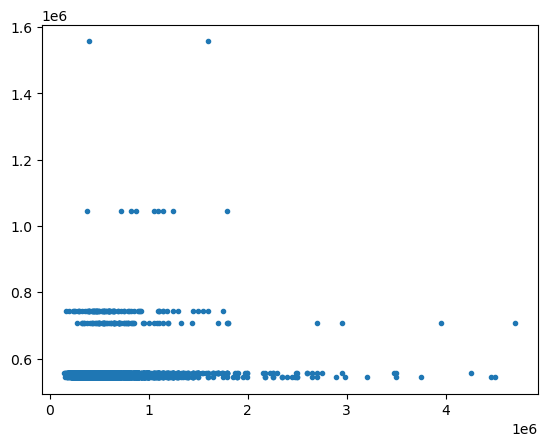

In [141]:
test(x_train['Floors'], 2)

In [142]:
f = np.polyfit(x_train['Floors'], x_train['Price'], 2)
p = np.poly1d(f)
fit = p(x_train['Floors'])
x_train['Floors'] = fit

## Energy Label

<AxesSubplot:xlabel='Energy label', ylabel='Price'>

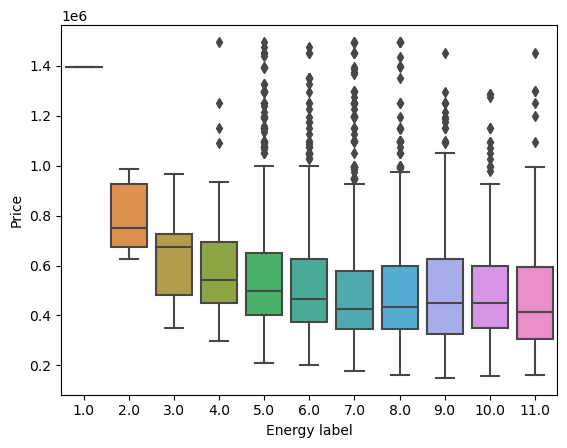

In [143]:
sns.boxplot(x = 'Energy label', y= 'Price', data = x_traincheaper)

Energy label pricing doesn't seem to be very affected when going to A flat and below.

In [144]:
r = np.corrcoef(x_train['Energy label'], x_train['Price'])
r[0,1]

-0.10746564904909504

       3             2
-1174 x + 3.064e+04 x - 2.658e+05 x + 1.265e+06


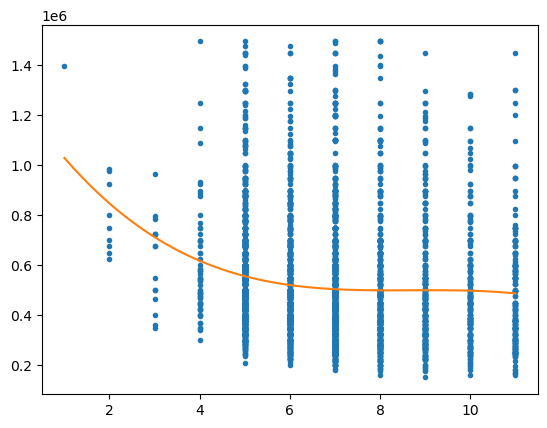

In [145]:
polyline(x_traincheaper['Energy label'], 3)

0.14538609800026311


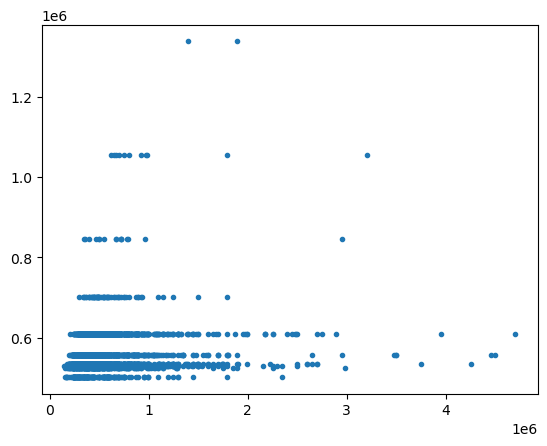

In [146]:
test(x_train['Energy label'], 3)

In [147]:
f = np.polyfit(x_train['Energy label'], x_train['Price'], 3)
p = np.poly1d(f)
fit = p(x_train['Energy label'])
x_train['Energy label'] = fit

## Neighborhood pricing

<AxesSubplot:xlabel='Estimated neighbourhood price per m2', ylabel='Price'>

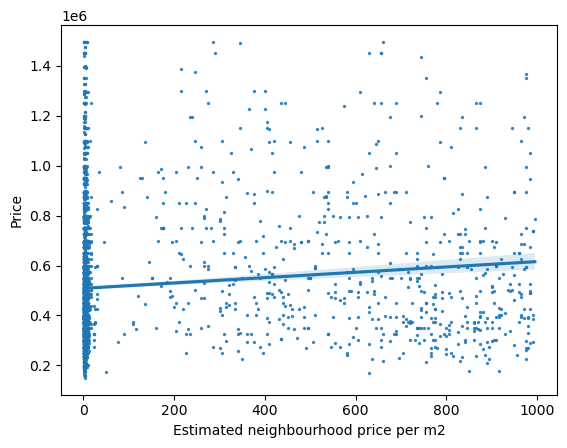

In [148]:
sns.regplot(x = 'Estimated neighbourhood price per m2', y= 'Price', data = x_traincheaper, scatter_kws = {'s': 2})

In [149]:
r = np.corrcoef(x_train['Estimated neighbourhood price per m2'], x_train['Price'])
r[0,1]

0.12216573049953755

<AxesSubplot:xlabel='Estimated neighbourhood price per m2', ylabel='Price'>

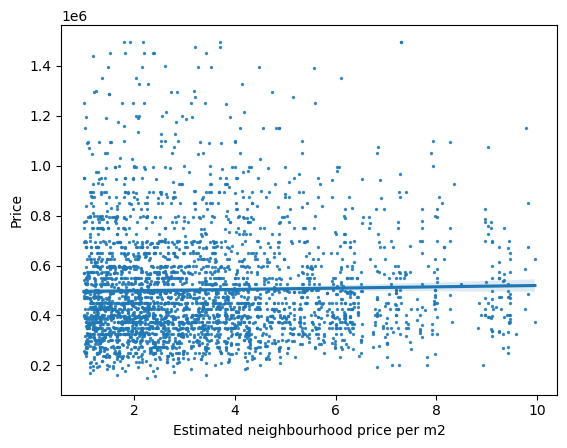

In [150]:
x_traincheaper2 = x_traincheaper[x_traincheaper['Estimated neighbourhood price per m2'] < 10]

sns.regplot(x = 'Estimated neighbourhood price per m2', y= 'Price', data = x_traincheaper2, scatter_kws = {'s': 2})

<AxesSubplot:xlabel='Estimated neighbourhood price per m2', ylabel='Price'>

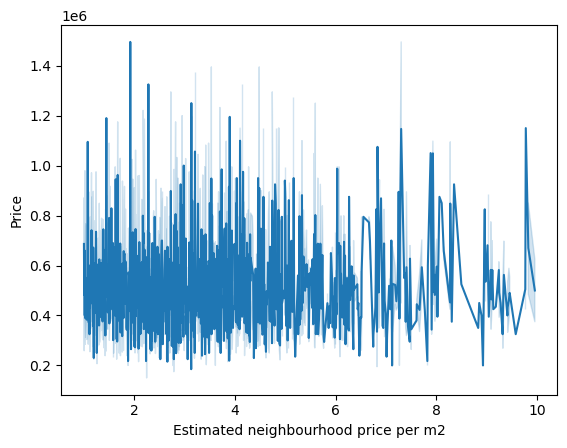

In [151]:
sns.lineplot(x = 'Estimated neighbourhood price per m2', y= 'Price', data = x_traincheaper2)

In [152]:
r = np.corrcoef(x_traincheaper2['Estimated neighbourhood price per m2'], x_traincheaper2['Price'])
r[0,1]

0.023782608565111794

## Bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='Price'>

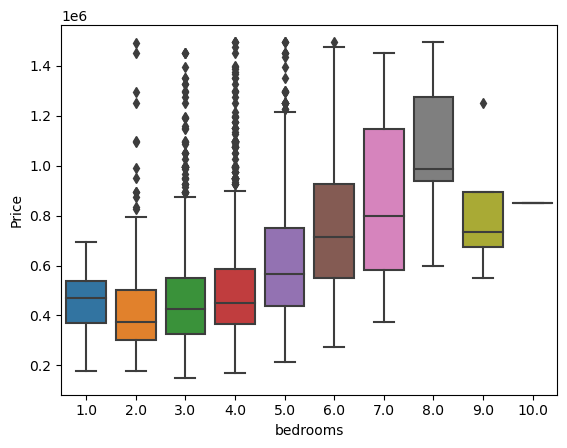

In [153]:
sns.boxplot(x = 'bedrooms', y= 'Price', data = x_traincheaper)

In [154]:
r = np.corrcoef(x_train['bedrooms'], x_train['Price'])
r[0,1]

0.31484679943783833

       3             2
-3480 x + 6.202e+04 x - 2.42e+05 x + 7.113e+05


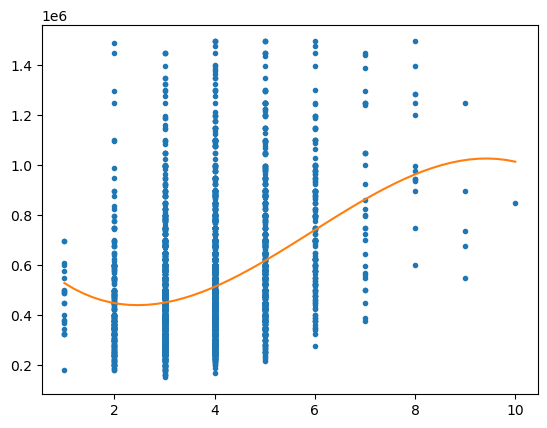

In [155]:
polyline(x_traincheaper['bedrooms'], 3)

0.34930113379511574


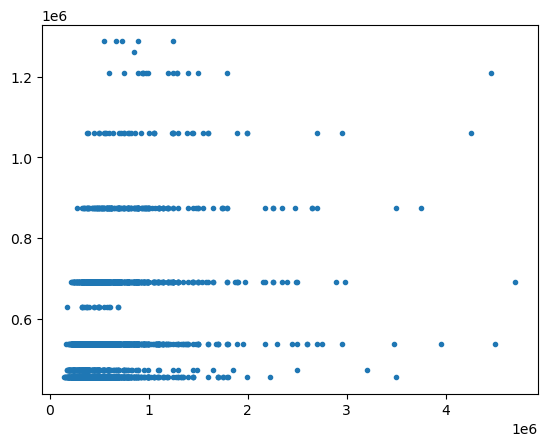

In [156]:
test(x_train['bedrooms'],3)

In [157]:
swap(x_train['bedrooms'],3)

In [158]:
f = np.polyfit(x_train['bedrooms'], x_train['Price'], 3)
p = np.poly1d(f)
fit = p(x_train['bedrooms'])
x_train['bedrooms'] = fit

In [159]:
x_train['bedrooms']

501     474451.830900
5270    455706.004060
832     455706.004060
4658    539341.207131
1239    539341.207131
            ...      
3209    474451.830900
1260    539341.207131
1074    539341.207131
2548    690903.756389
1369    539341.207131
Name: bedrooms, Length: 4148, dtype: float64

## Basement

<AxesSubplot:xlabel='basement', ylabel='Price'>

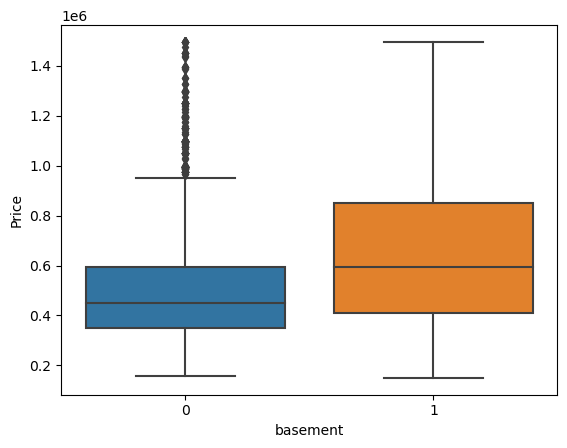

In [160]:
sns.boxplot(x = 'basement', y= 'Price', data = x_traincheaper)

In [161]:
r = np.corrcoef(x_train['basement'], x_train['Price'])
r[0,1]

0.23355660912785692

## Attic

<AxesSubplot:xlabel='attic', ylabel='Price'>

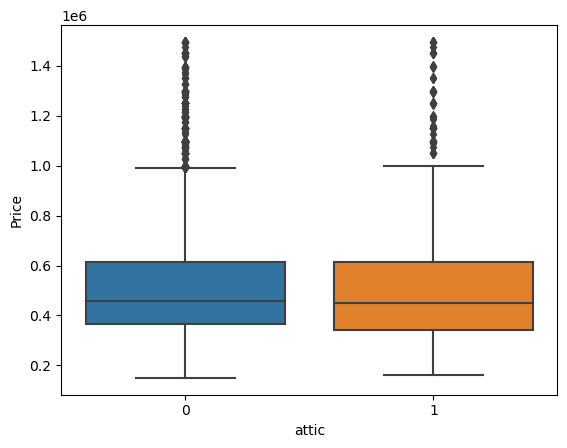

In [162]:
sns.boxplot(x = 'attic', y= 'Price', data = x_traincheaper)

In [163]:
r = np.corrcoef(x_train['attic'], x_train['Price'])
r[0,1]

-0.021283545935919593

## Centrum

<AxesSubplot:xlabel='centrum', ylabel='Price'>

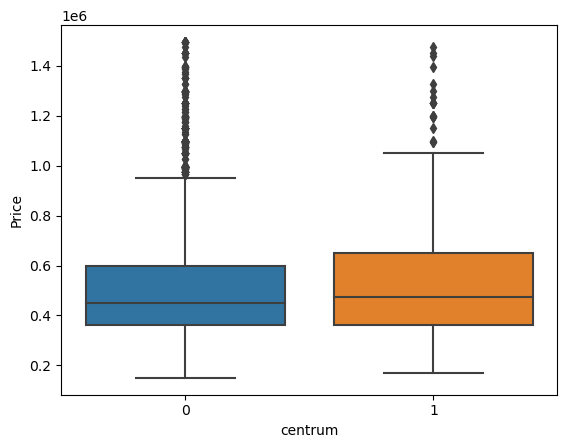

In [164]:
sns.boxplot(x = 'centrum', y= 'Price', data = x_traincheaper)

In [165]:
r = np.corrcoef(x_train['centrum'], x_train['Price'])
r[0,1]

-0.00011096084913395089

## Park

<AxesSubplot:xlabel='park', ylabel='Price'>

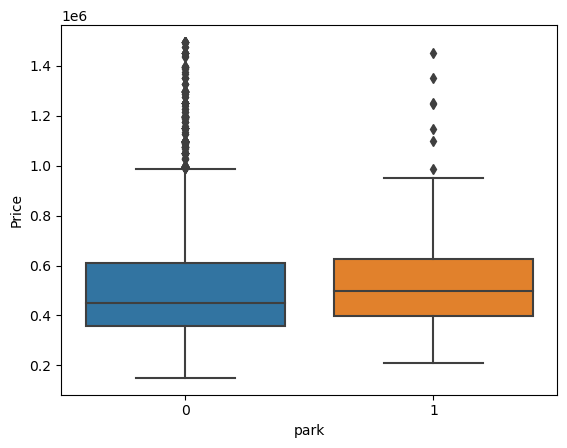

In [166]:
sns.boxplot(x = 'park', y= 'Price', data = x_traincheaper)

In [167]:
r = np.corrcoef(x_train['park'], x_train['Price'])
r[0,1]

0.04885257632316944

## Landelijk

<AxesSubplot:xlabel='landelijk', ylabel='Price'>

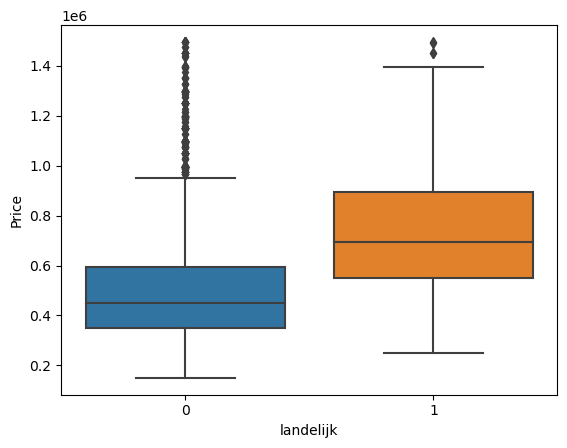

In [168]:
sns.boxplot(x = 'landelijk', y= 'Price', data = x_traincheaper)

In [169]:
r = np.corrcoef(x_train['landelijk'], x_train['Price'])
r[0,1]

0.2341454272880532

## Woonwijk

<AxesSubplot:xlabel='woonwijk', ylabel='Price'>

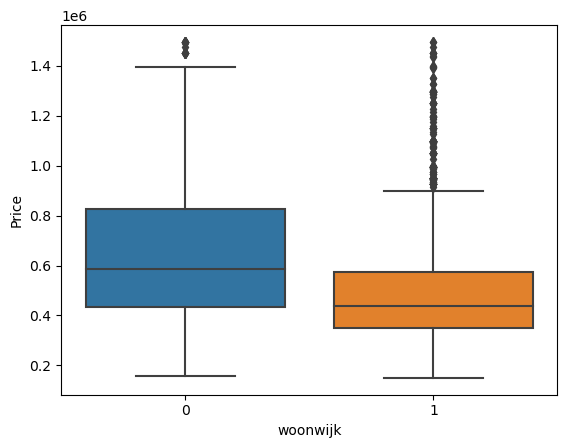

In [170]:
sns.boxplot(x = 'woonwijk', y= 'Price', data = x_traincheaper)

In [171]:
r = np.corrcoef(x_train['woonwijk'], x_train['Price'])
r[0,1]

-0.26151720229827924

## Beschutte

<AxesSubplot:xlabel='beschutte', ylabel='Price'>

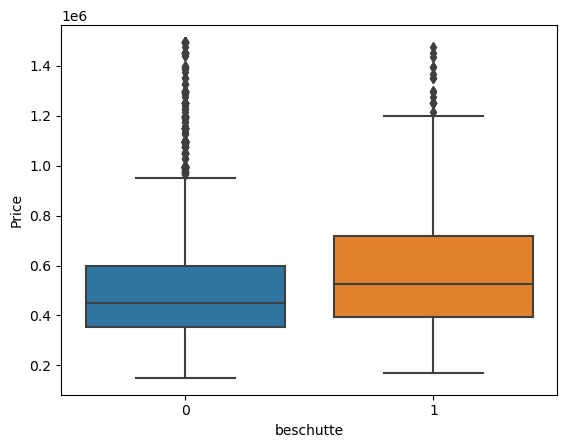

In [172]:
sns.boxplot(x = 'beschutte', y= 'Price', data = x_traincheaper)

In [173]:
r = np.corrcoef(x_train['beschutte'], x_train['Price'])
r[0,1]

0.17600796445477898

## Front yard

<AxesSubplot:xlabel='front', ylabel='Price'>

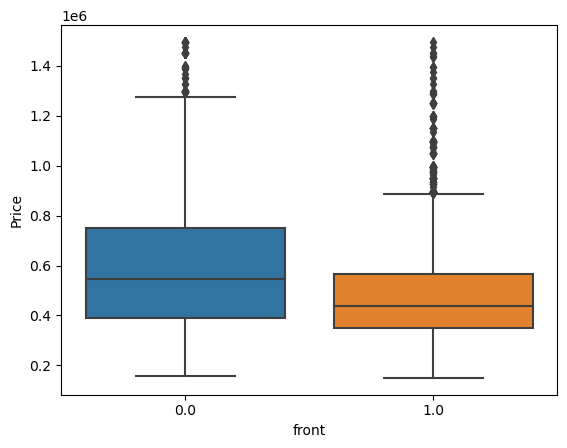

In [174]:
sns.boxplot(x = 'front', y= 'Price', data = x_traincheaper)

Interesting, it appears houses with a front yard are cheaper, I suspect it's misleading because grachtenpands don't exactly have a front yard, and are more expensive.

In [175]:
r = np.corrcoef(x_train['front'], x_train['Price'])
r[0,1]

-0.26158666896848726

<AxesSubplot:xlabel='front', ylabel='Price'>

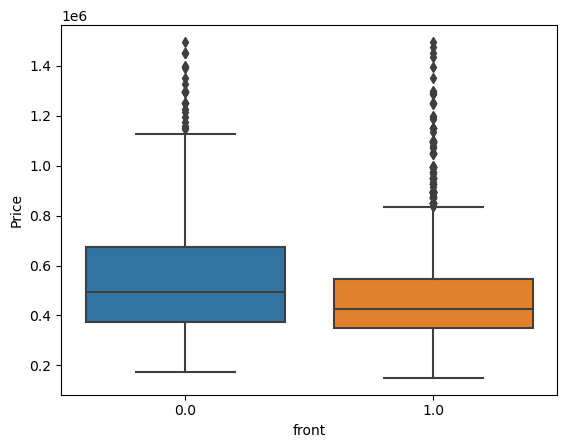

In [176]:
dffrontcheck = x_traincheaper[x_traincheaper['centrum'] == 0]
dffrontcheck = dffrontcheck[dffrontcheck['woonwijk']==1]
sns.boxplot(x = 'front', y= 'Price', data = dffrontcheck)

...apparently even after filtering out houses to be more suburban, front yard houses are still cheaper. Fascinating.

## Back yard

<AxesSubplot:xlabel='back', ylabel='Price'>

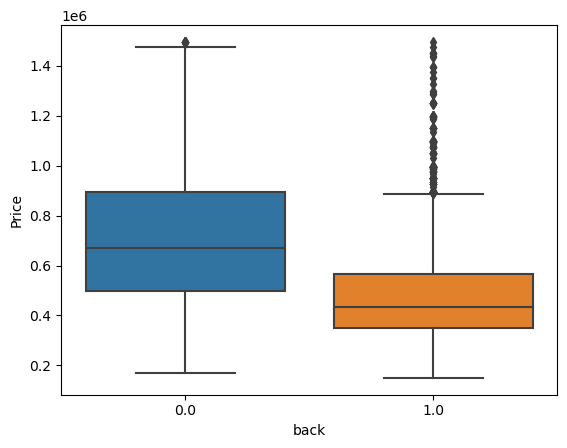

In [177]:
sns.boxplot(x = 'back', y= 'Price', data = x_traincheaper)

In [178]:
r = np.corrcoef(x_train['back'], x_train['Price'])
r[0,1]

-0.3966430366331266

<AxesSubplot:xlabel='front', ylabel='Price'>

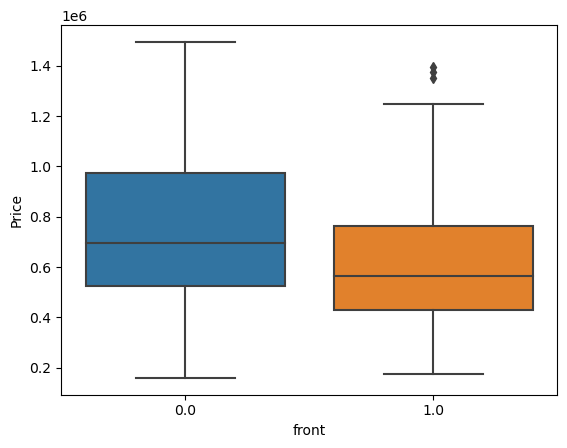

In [179]:
dfbackcheck = x_traincheaper[x_traincheaper['centrum'] == 0]
dfbackcheck = dfbackcheck[dfbackcheck['woonwijk']==0]
sns.boxplot(x = 'front', y= 'Price', data = dfbackcheck)

Even backyard houses are cheaper, I can't come up with a decent hypothesis, even after looking into the site the data come from; none of the listings are apartments.

## Sundeck

<AxesSubplot:xlabel='sundeck', ylabel='Price'>

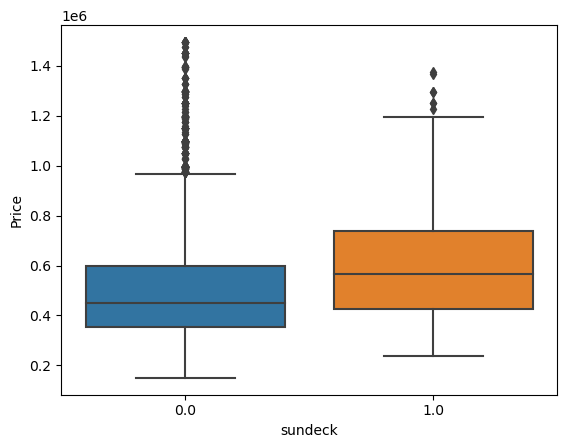

In [180]:
sns.boxplot(x = 'sundeck', y= 'Price', data = x_traincheaper)

In [181]:
r = np.corrcoef(x_train['sundeck'], x_train['Price'])
r[0,1]

0.0785767375356657

## Patio

<AxesSubplot:xlabel='patio', ylabel='Price'>

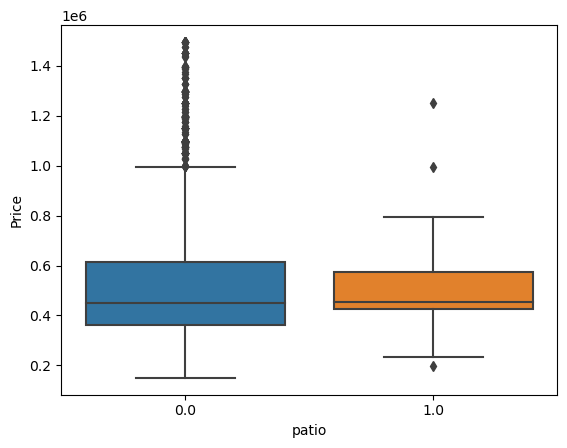

In [182]:
sns.boxplot(x = 'patio', y= 'Price', data = x_traincheaper)

In [183]:
r = np.corrcoef(x_train['patio'], x_train['Price'])
r[0,1]

-0.009283939354135554

## Side

<AxesSubplot:xlabel='side', ylabel='Price'>

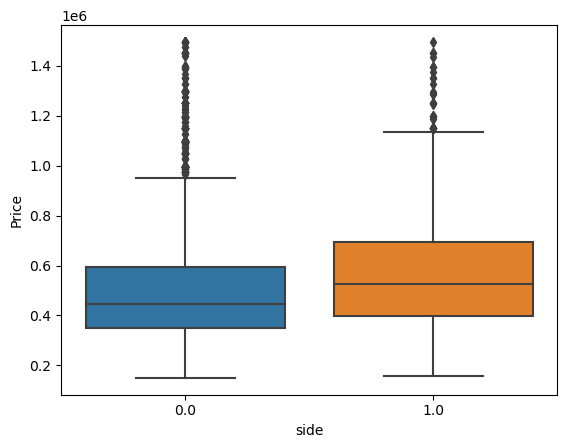

In [184]:
sns.boxplot(x = 'side', y= 'Price', data = x_traincheaper)

In [185]:
r = np.corrcoef(x_train['side'], x_train['Price'])
r[0,1]

0.07232300437602833

## Garden Around

<AxesSubplot:xlabel='gardenaround', ylabel='Price'>

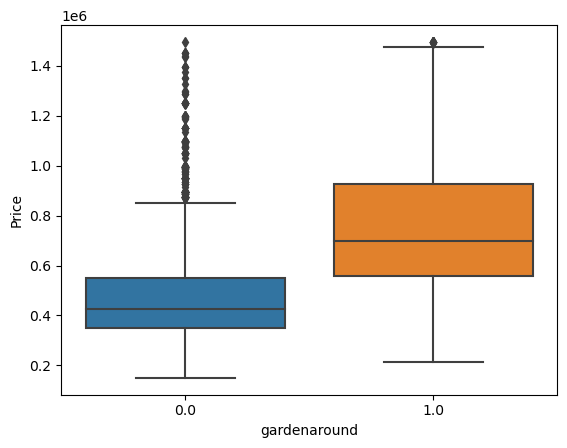

In [186]:
sns.boxplot(x = 'gardenaround', y= 'Price', data = x_traincheaper)

In [187]:
r = np.corrcoef(x_train['gardenaround'], x_train['Price'])
r[0,1]

0.46091717229619056

# Making model

In [188]:
#Getting one hot values from categorical data
x_train = pd.get_dummies(x_train, columns = ['Build type', 'House type', 'Roof'])
x_test = pd.get_dummies(x_test, columns = ['Build type', 'House type', 'Roof'])
x_train = x_train.drop(['Address', 'City', 'Position','Garden'], axis = 1)
x_test = x_test.drop(['Address', 'City', 'Position','Garden'], axis = 1)

In [189]:
#Seperating y values
y_train = x_train['Price']
y_test = x_test['Price']
x_train = x_train.drop('Price', axis = 1)
x_test = x_test.drop('Price', axis = 1)

In [190]:
#Getting names so I don't have to manually type in every x value
names = []
for name in x_train:
    names.append(name)

In [191]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [192]:
#Fitting and prediction
lr.fit(x_train[['Living space size (m2)']],y_train)
yhat_train = lr.predict(x_train[['Living space size (m2)']])
yhat_test = lr.predict(x_test[['Living space size (m2)']])

In [193]:
#Fitting model and prediction
lr.fit(x_train[names],y_train)
yhat_train = lr.predict(x_train[names])
yhat_test = lr.predict(x_test[names])

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

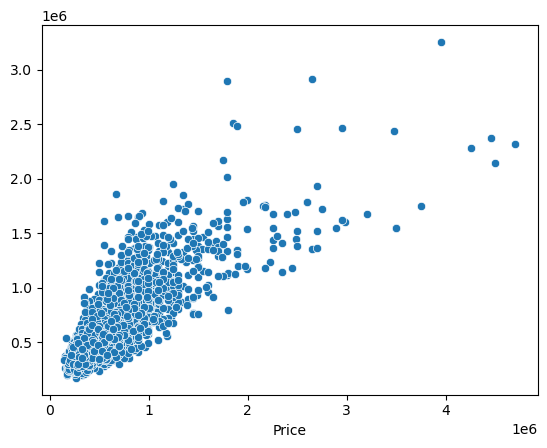

In [194]:
#Testing accuracy based on correlation between  and actual values (Train)
sns.scatterplot(y_train,yhat_train)

In [195]:
#Correlation score between actual and predicted values
r = np.corrcoef(y_train, yhat_train)
r[0,1]

0.8168432106569452

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

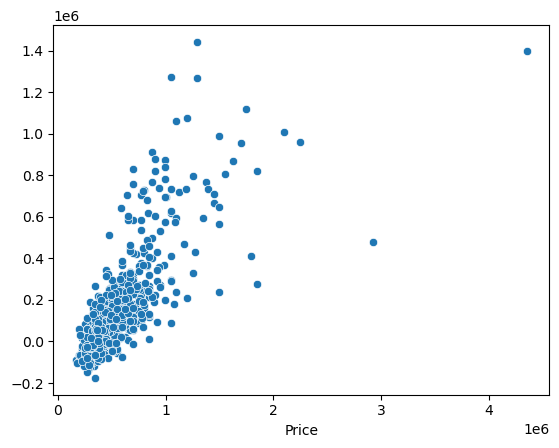

In [196]:
#Testing accuracy based on correlation between  and actual values (Test)
sns.scatterplot(y_test,yhat_test)

In [197]:
r = np.corrcoef(y_test, yhat_test)
r[0,1]

0.7630348269768904

# Attempt at creating graphs en masse (fail)

In [198]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Example DataFrame
# data = df

# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=len(data.columns))

# # Iterate over each column and plot on the corresponding subplot
# for i, column in enumerate(data.columns):
#     if (str(dtype)) == 'float64':
#         print()
#         sns.lineplot(x = data['Price'], y=data[column], ax=axes[i])
#         axes[i].set_title(column)

# # Adjust layout and display the plots
# plt.show()

# axes

In [199]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# # Example DataFrame

# # Create subplots
# fig, axes = plt.subplots(nrows=3, ncols=3)

# # Iterate over each column and plot on the corresponding subplot
# for i, column in df.dtypes.items():
#     if str(column) == 'float64':
#         sns.lineplot(x = df['Price'], y=df[i], ax=axes[i])
#         axes[i].set_title(column)

# # # Adjust layout and display the plots
# plt.show()

# DF

In [200]:
x_train

,Lot size (m2),Living space size (m2),Build year,Rooms,Toilet,Floors,Energy label,Estimated neighbourhood price per m2,bedrooms,basement,attic,centrum,park,landelijk,woonwijk,beschutte,front,back,sundeck,patio,side,gardenaround,Build type_Bestaande bouw,House type_Bungalow,House type_Eengezinswoning,House type_Herenhuis,House type_Landhuis,House type_Villa,House type_Woonboerderij,Roof_Dwarskap,Roof_Lessenaardak,Roof_Mansarde,Roof_Plat,Roof_Samengesteld,Roof_Schilddak,Roof_Tentdak,Roof_Zadeldak
501,202.0,93.0,1922.0,424917.615344,460297.752921,555574.936697,523751.416060,1.140,474451.830900,0,0,1,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5270,136.0,90.0,1920.0,424917.615344,460297.752921,555574.936697,534009.845575,3.830,455706.004060,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
832,357.0,175.0,1971.0,424917.615344,460297.752921,742433.541883,534009.845575,1.960,455706.004060,0,0,0,0,0,1,0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4658,256.0,147.0,1969.0,499604.611577,703184.555172,543605.746899,528690.342945,1.320,539341.207131,0,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1239,656.0,227.0,2007.0,594707.382111,703184.555172,555574.936697,608533.991778,1.145,539341.207131,0,1,0,0,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,458.0,60.0,1962.0,371845.472410,465827.800965,742433.541883,500857.966777,2.390,474451.830900,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1260,460.0,146.0,1996.0,990519.549510,460297.752921,555574.936697,608533.991778,2.800,539341.207131,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1074,168.0,130.0,1970.0,499604.611577,703184.555172,543605.746899,556745.391015,3.340,539341.207131,0,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2548,197.0,134.0,1981.0,594707.382111,460297.752921,543605.746899,534009.845575,1.805,690903.756389,0,0,0,0,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0


# Conclusion

I have been able to reasonably predict the price of a house with a correlation strength of about .76. Living space size alone can reasonably predict the house price also, and the other stronger correlations likely correlate heavily with living space, such as amount of rooms. The factor I found most surprising is that having a front yard apparently decreases housing value, even after filtering out urban centers.